In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 5.3 MB/s eta 0:00:000:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [2]:
from ultralytics import YOLO
from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dsepTBMqjKzd8daoilTF")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 36.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.9 MB/s eta 0:00:0000:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sigstore 3.6.1 requires rich~=13.0, but you have rich 14.0.0 which is incompatible.
datasets 3.5.0 requires fsspec[http]<=2024.


Extracting Dataset Version Zip to PPE_Detection-2 in yolov11:: 100%|██████████| 6472/6472 [00:00<00:00, 7192.31it/s]


In [4]:
# %load '/kaggle/working/PPE_Detection-2/data.yaml'
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 7
names: ['Dust Mask', 'Eye Wear', 'Glove', 'Protective Boots', 'Protective Helmet', 'Safety Vest', 'Shield']

roboflow:
  workspace: project-uyrxf
  project: ppe_detection-v1x3l
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-uyrxf/ppe_detection-v1x3l/dataset/2

In [ ]:
# %load '/kaggle/working/PPE_Detection-2/data.yaml'

# %load '/kaggle/working/PPE_Detection-2/data.yaml'
train: /kaggle/working/PPE_Detection-2/train/images
val: /kaggle/working/PPE_Detection-2/valid/images
test: /kaggle/working/PPE_Detection-2/test/images

nc: 7
names: ['Dust Mask', 'Eye Wear', 'Glove', 'Protective Boots', 'Protective Helmet', 'Safety Vest', 'Shield']

roboflow:
  workspace: project-uyrxf
  project: ppe_detection-v1x3l
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-uyrxf/ppe_detection-v1x3l/dataset/2


In [6]:
%%writefile '/kaggle/working/PPE_Detection-2/data.yaml'

train: /kaggle/working/PPE_Detection-2/train/images
val: /kaggle/working/PPE_Detection-2/valid/images
test: /kaggle/working/PPE_Detection-2/test/images

nc: 7
names: ['Dust Mask', 'Eye Wear', 'Glove', 'Protective Boots', 'Protective Helmet', 'Safety Vest', 'Shield']

roboflow:
  workspace: project-uyrxf
  project: ppe_detection-v1x3l
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-uyrxf/ppe_detection-v1x3l/dataset/2

Overwriting /kaggle/working/PPE_Detection-2/data.yaml


In [7]:
# %load '/kaggle/working/PPE_Detection-2/data.yaml'

train: /kaggle/working/PPE_Detection-2/train/images
val: /kaggle/working/PPE_Detection-2/valid/images
test: /kaggle/working/PPE_Detection-2/test/images

nc: 7
names: ['Dust Mask', 'Eye Wear', 'Glove', 'Protective Boots', 'Protective Helmet', 'Safety Vest', 'Shield']

roboflow:
  workspace: project-uyrxf
  project: ppe_detection-v1x3l
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-uyrxf/ppe_detection-v1x3l/dataset/2


In [8]:
dataset.location

'/kaggle/working/PPE_Detection-2'

In [9]:
!yolo task=detect model=train data={dataset.location}/data.yaml model=yolo11l.pt epochs=60 imgsz=640

WARNING ⚠️ 'mode' argument is missing. Valid modes are frozenset({'train', 'predict', 'track', 'benchmark', 'export', 'val'}). Using default 'mode=train'.
100%|███████████████████████████████████████| 49.0M/49.0M [00:00<00:00, 238MB/s]
Ultralytics 8.3.131 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/PPE_Detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4

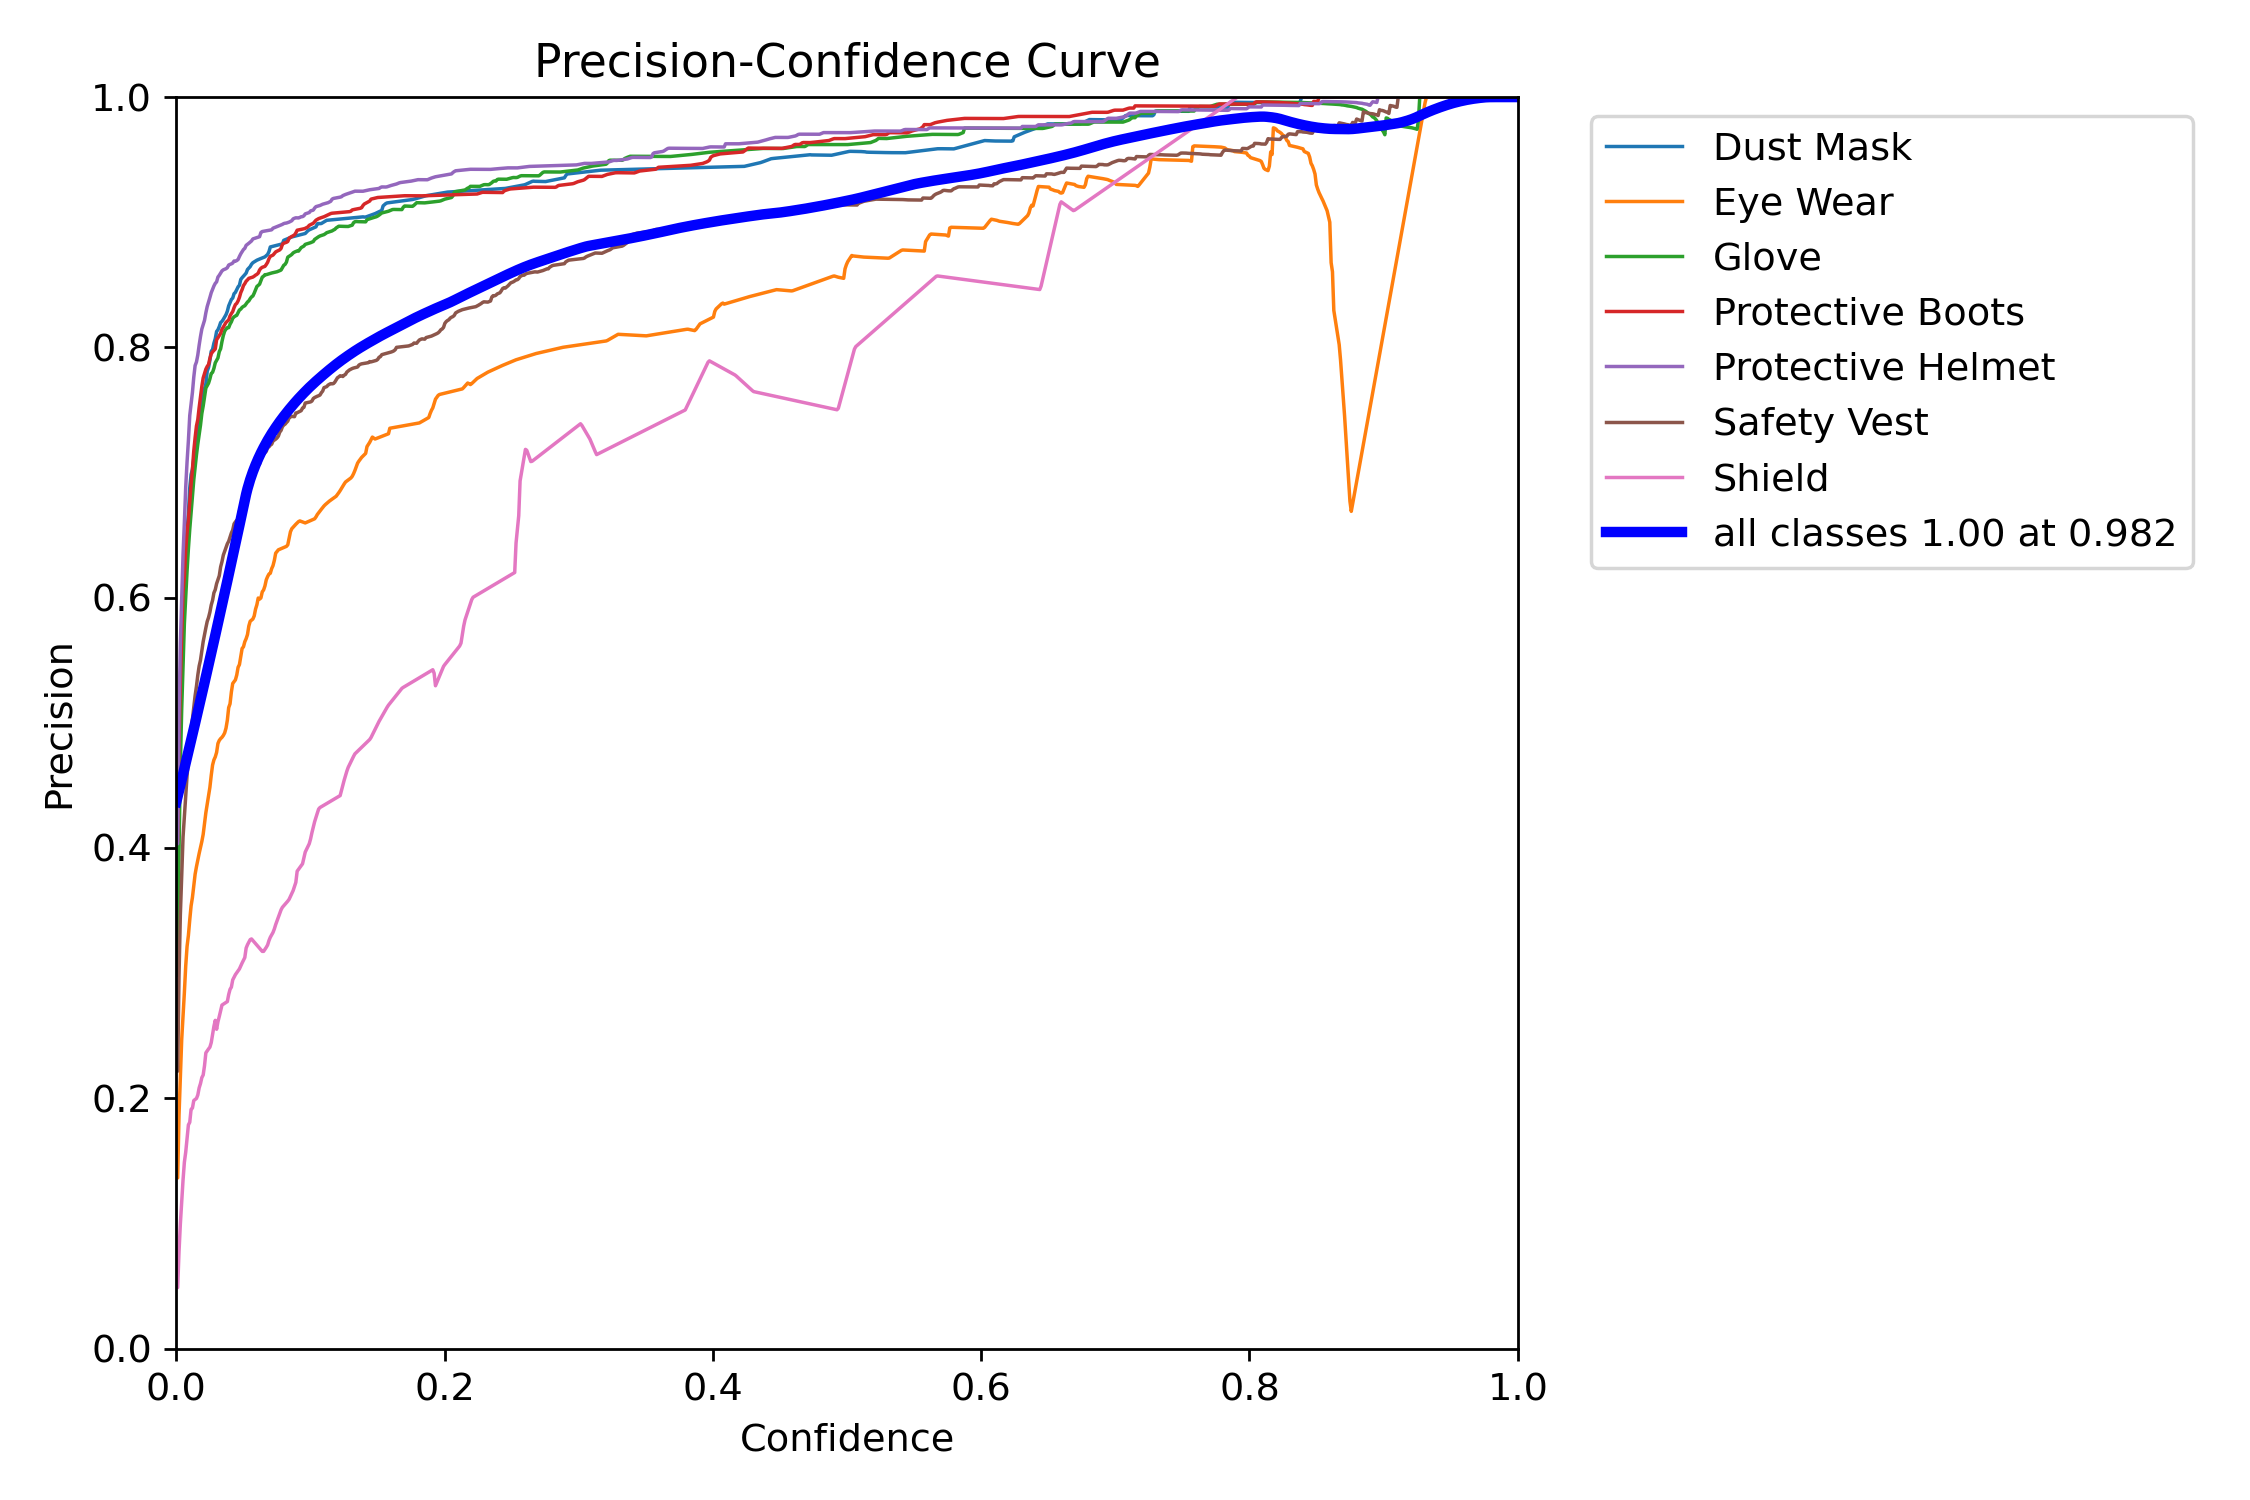

In [10]:
Image("/kaggle/working/runs/detect/train/P_curve.png", width=600)

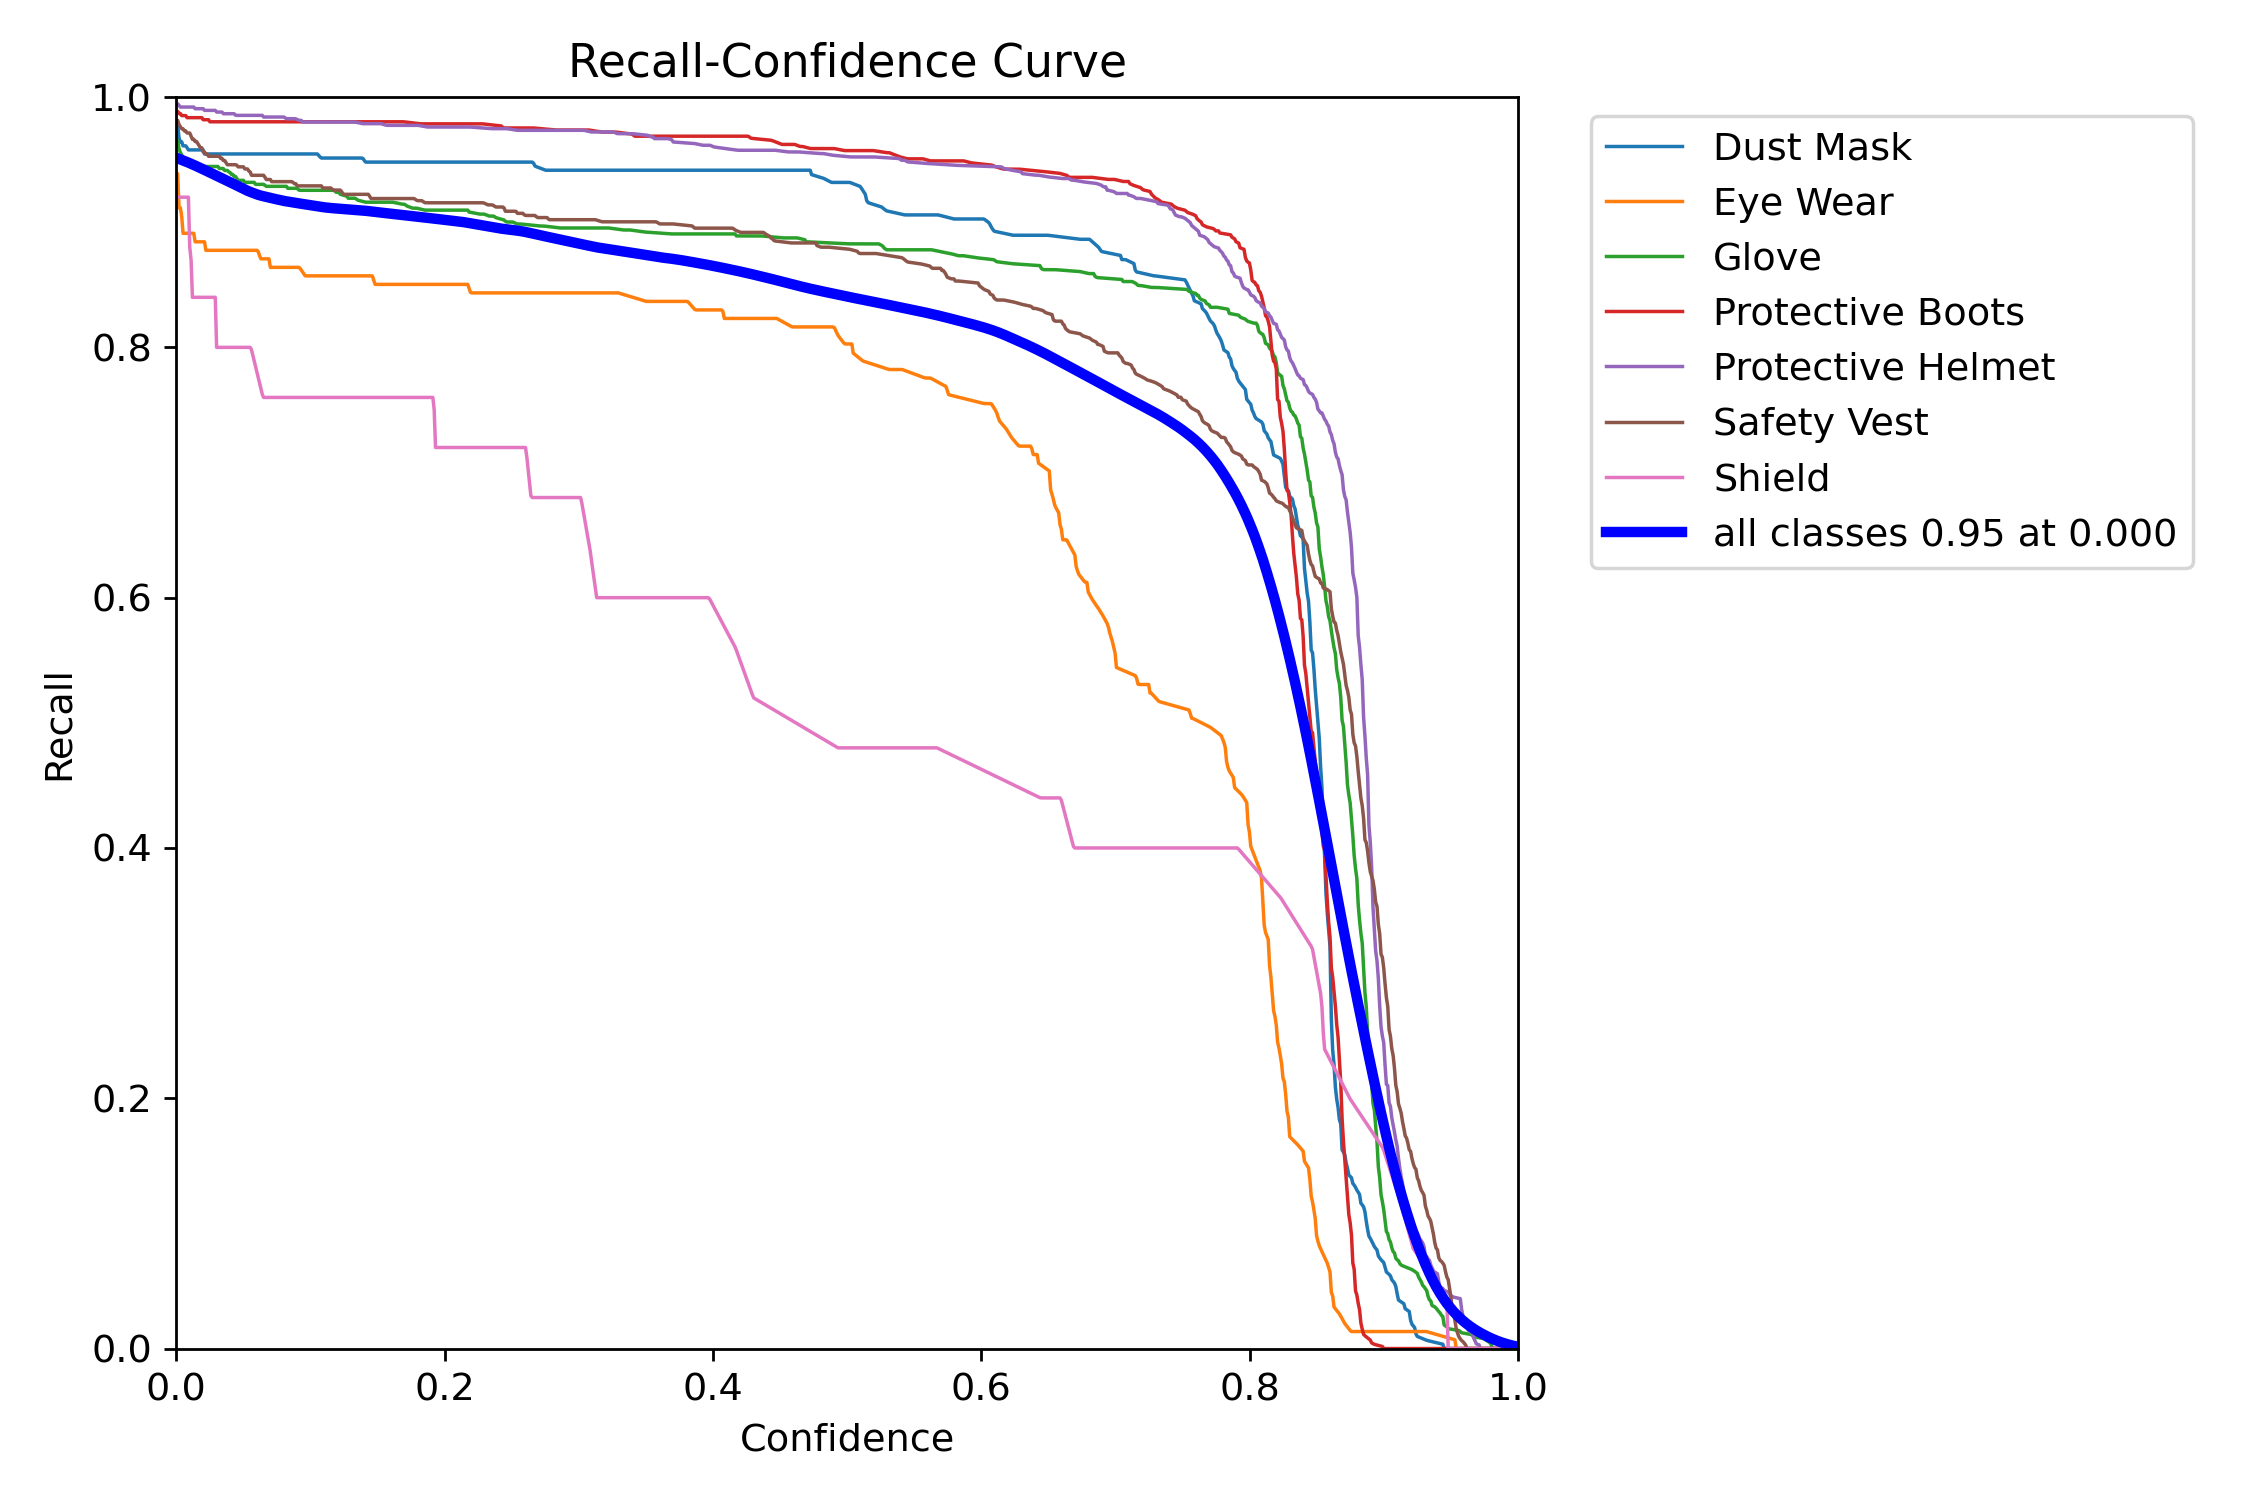

In [11]:
Image("/kaggle/working/runs/detect/train/R_curve.png", width=600)

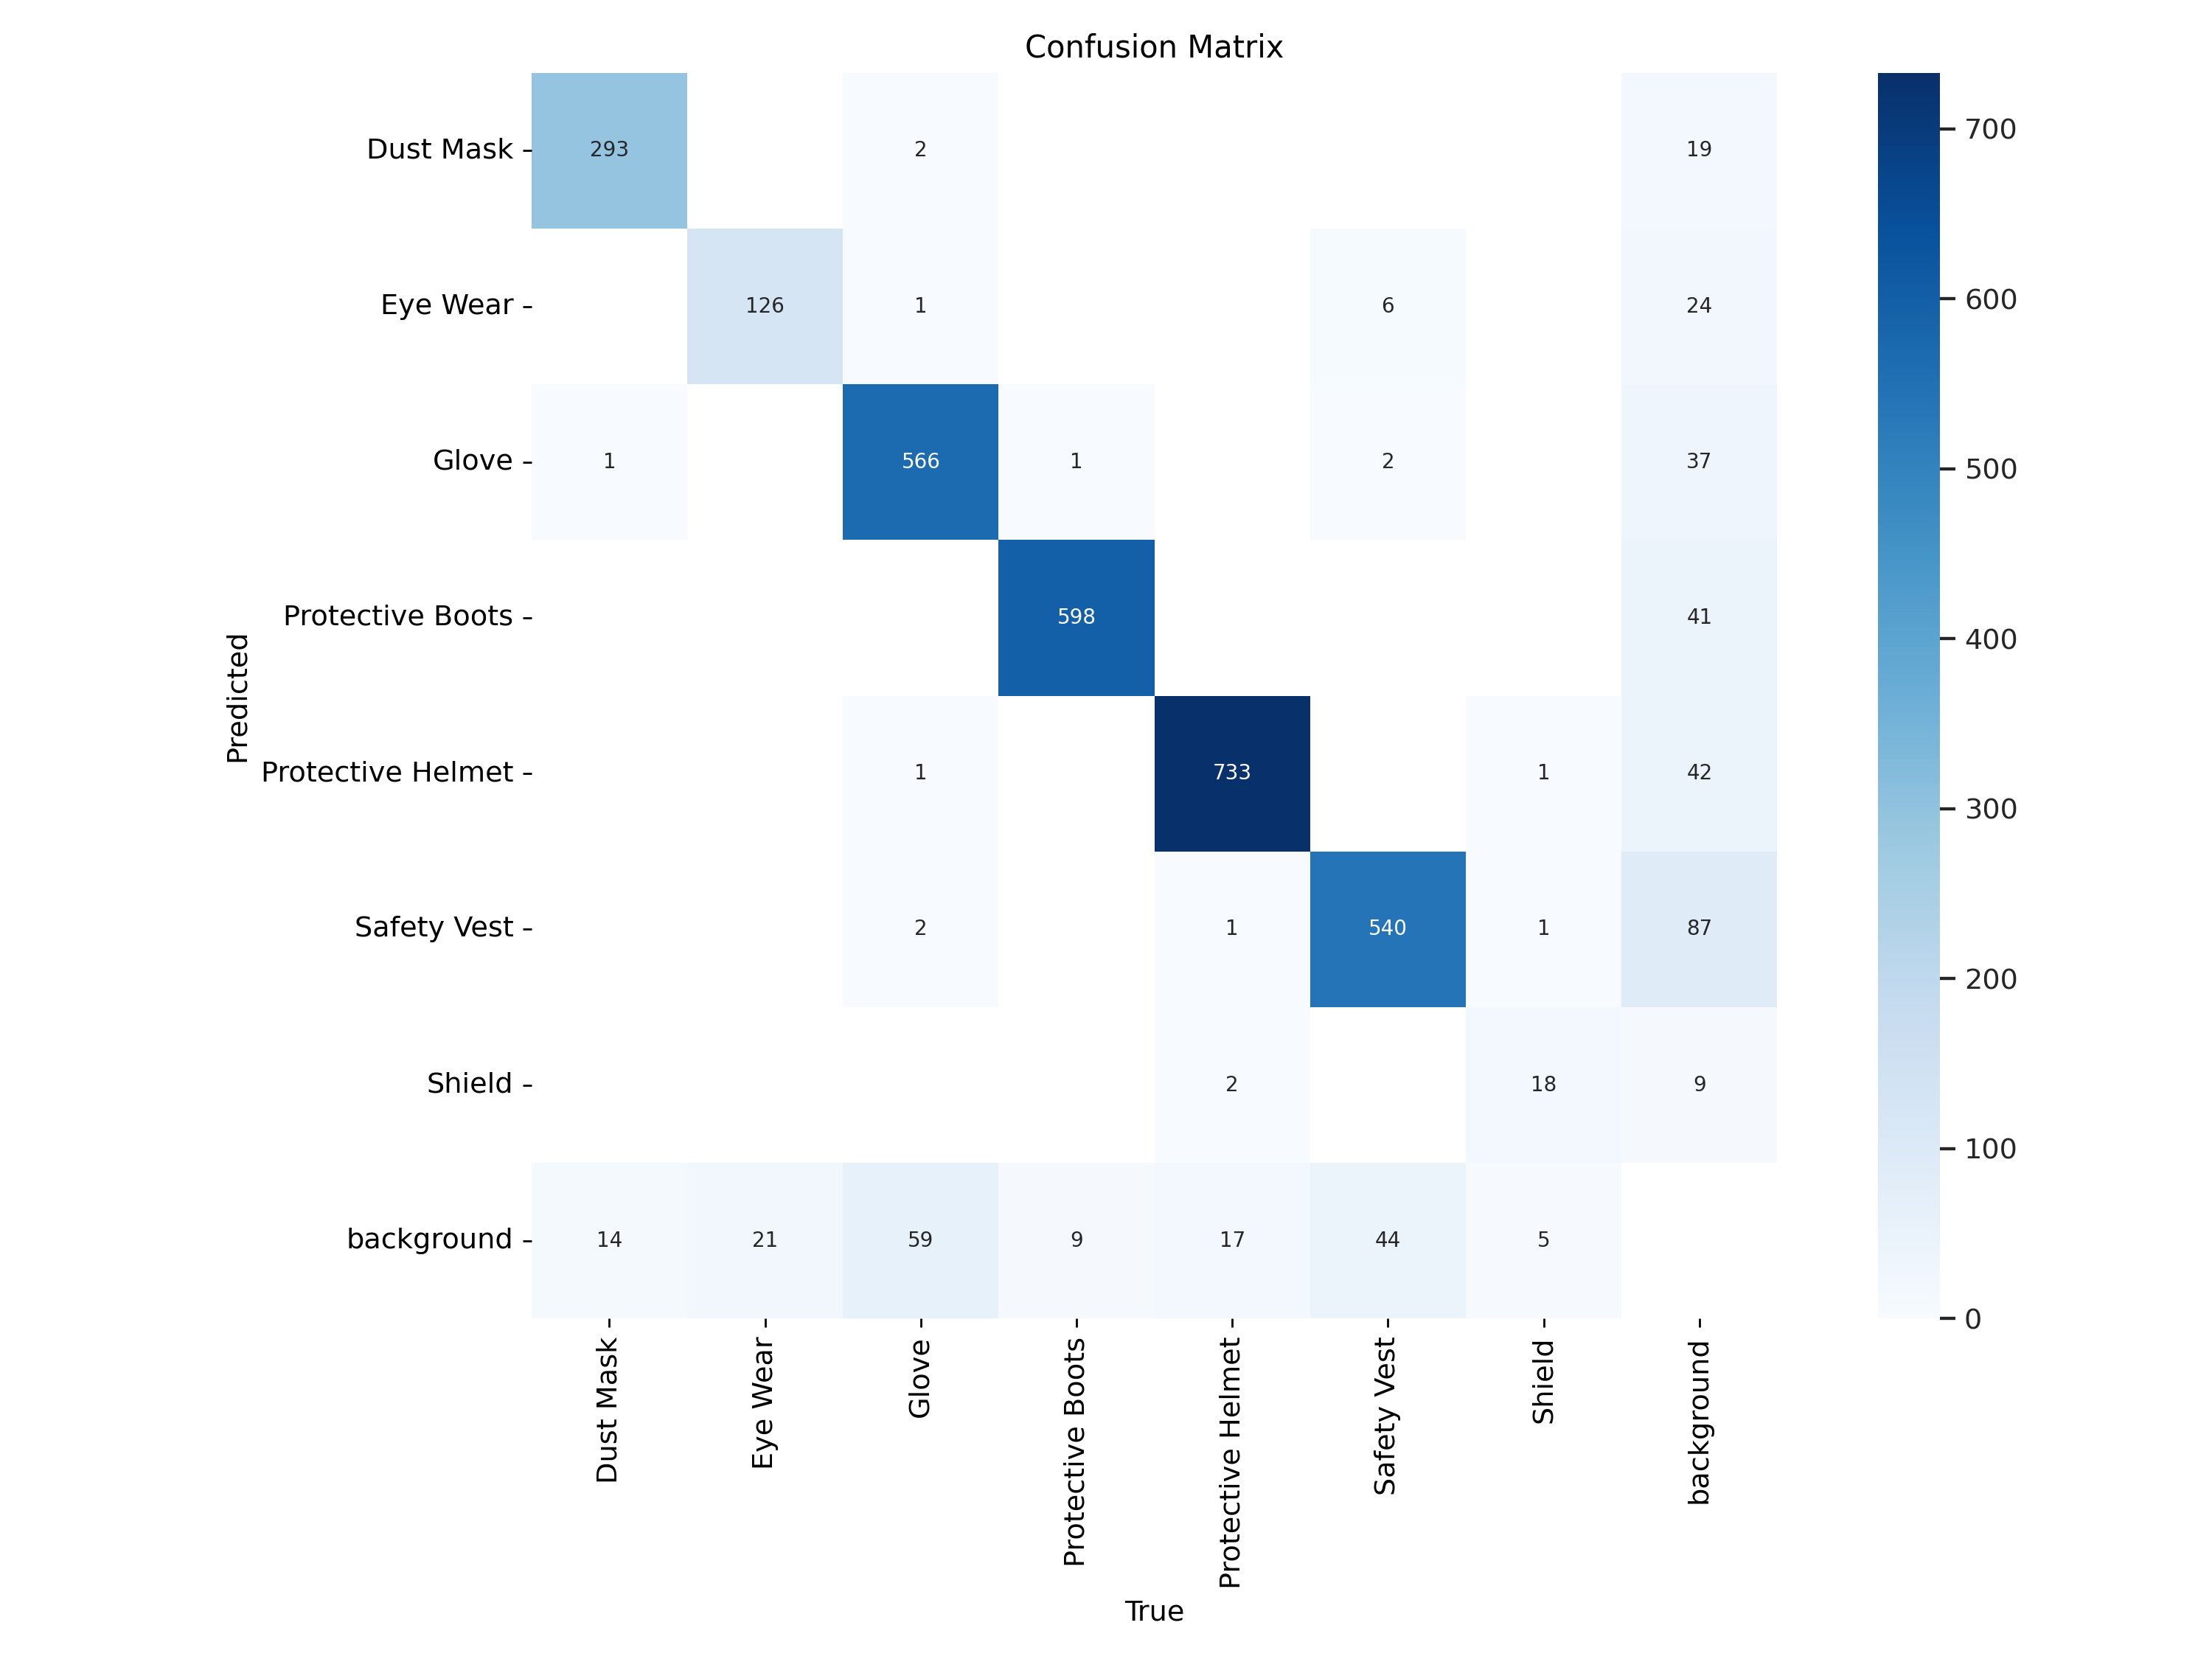

In [12]:
Image("/kaggle/working/runs/detect/train/confusion_matrix.png", width=600)

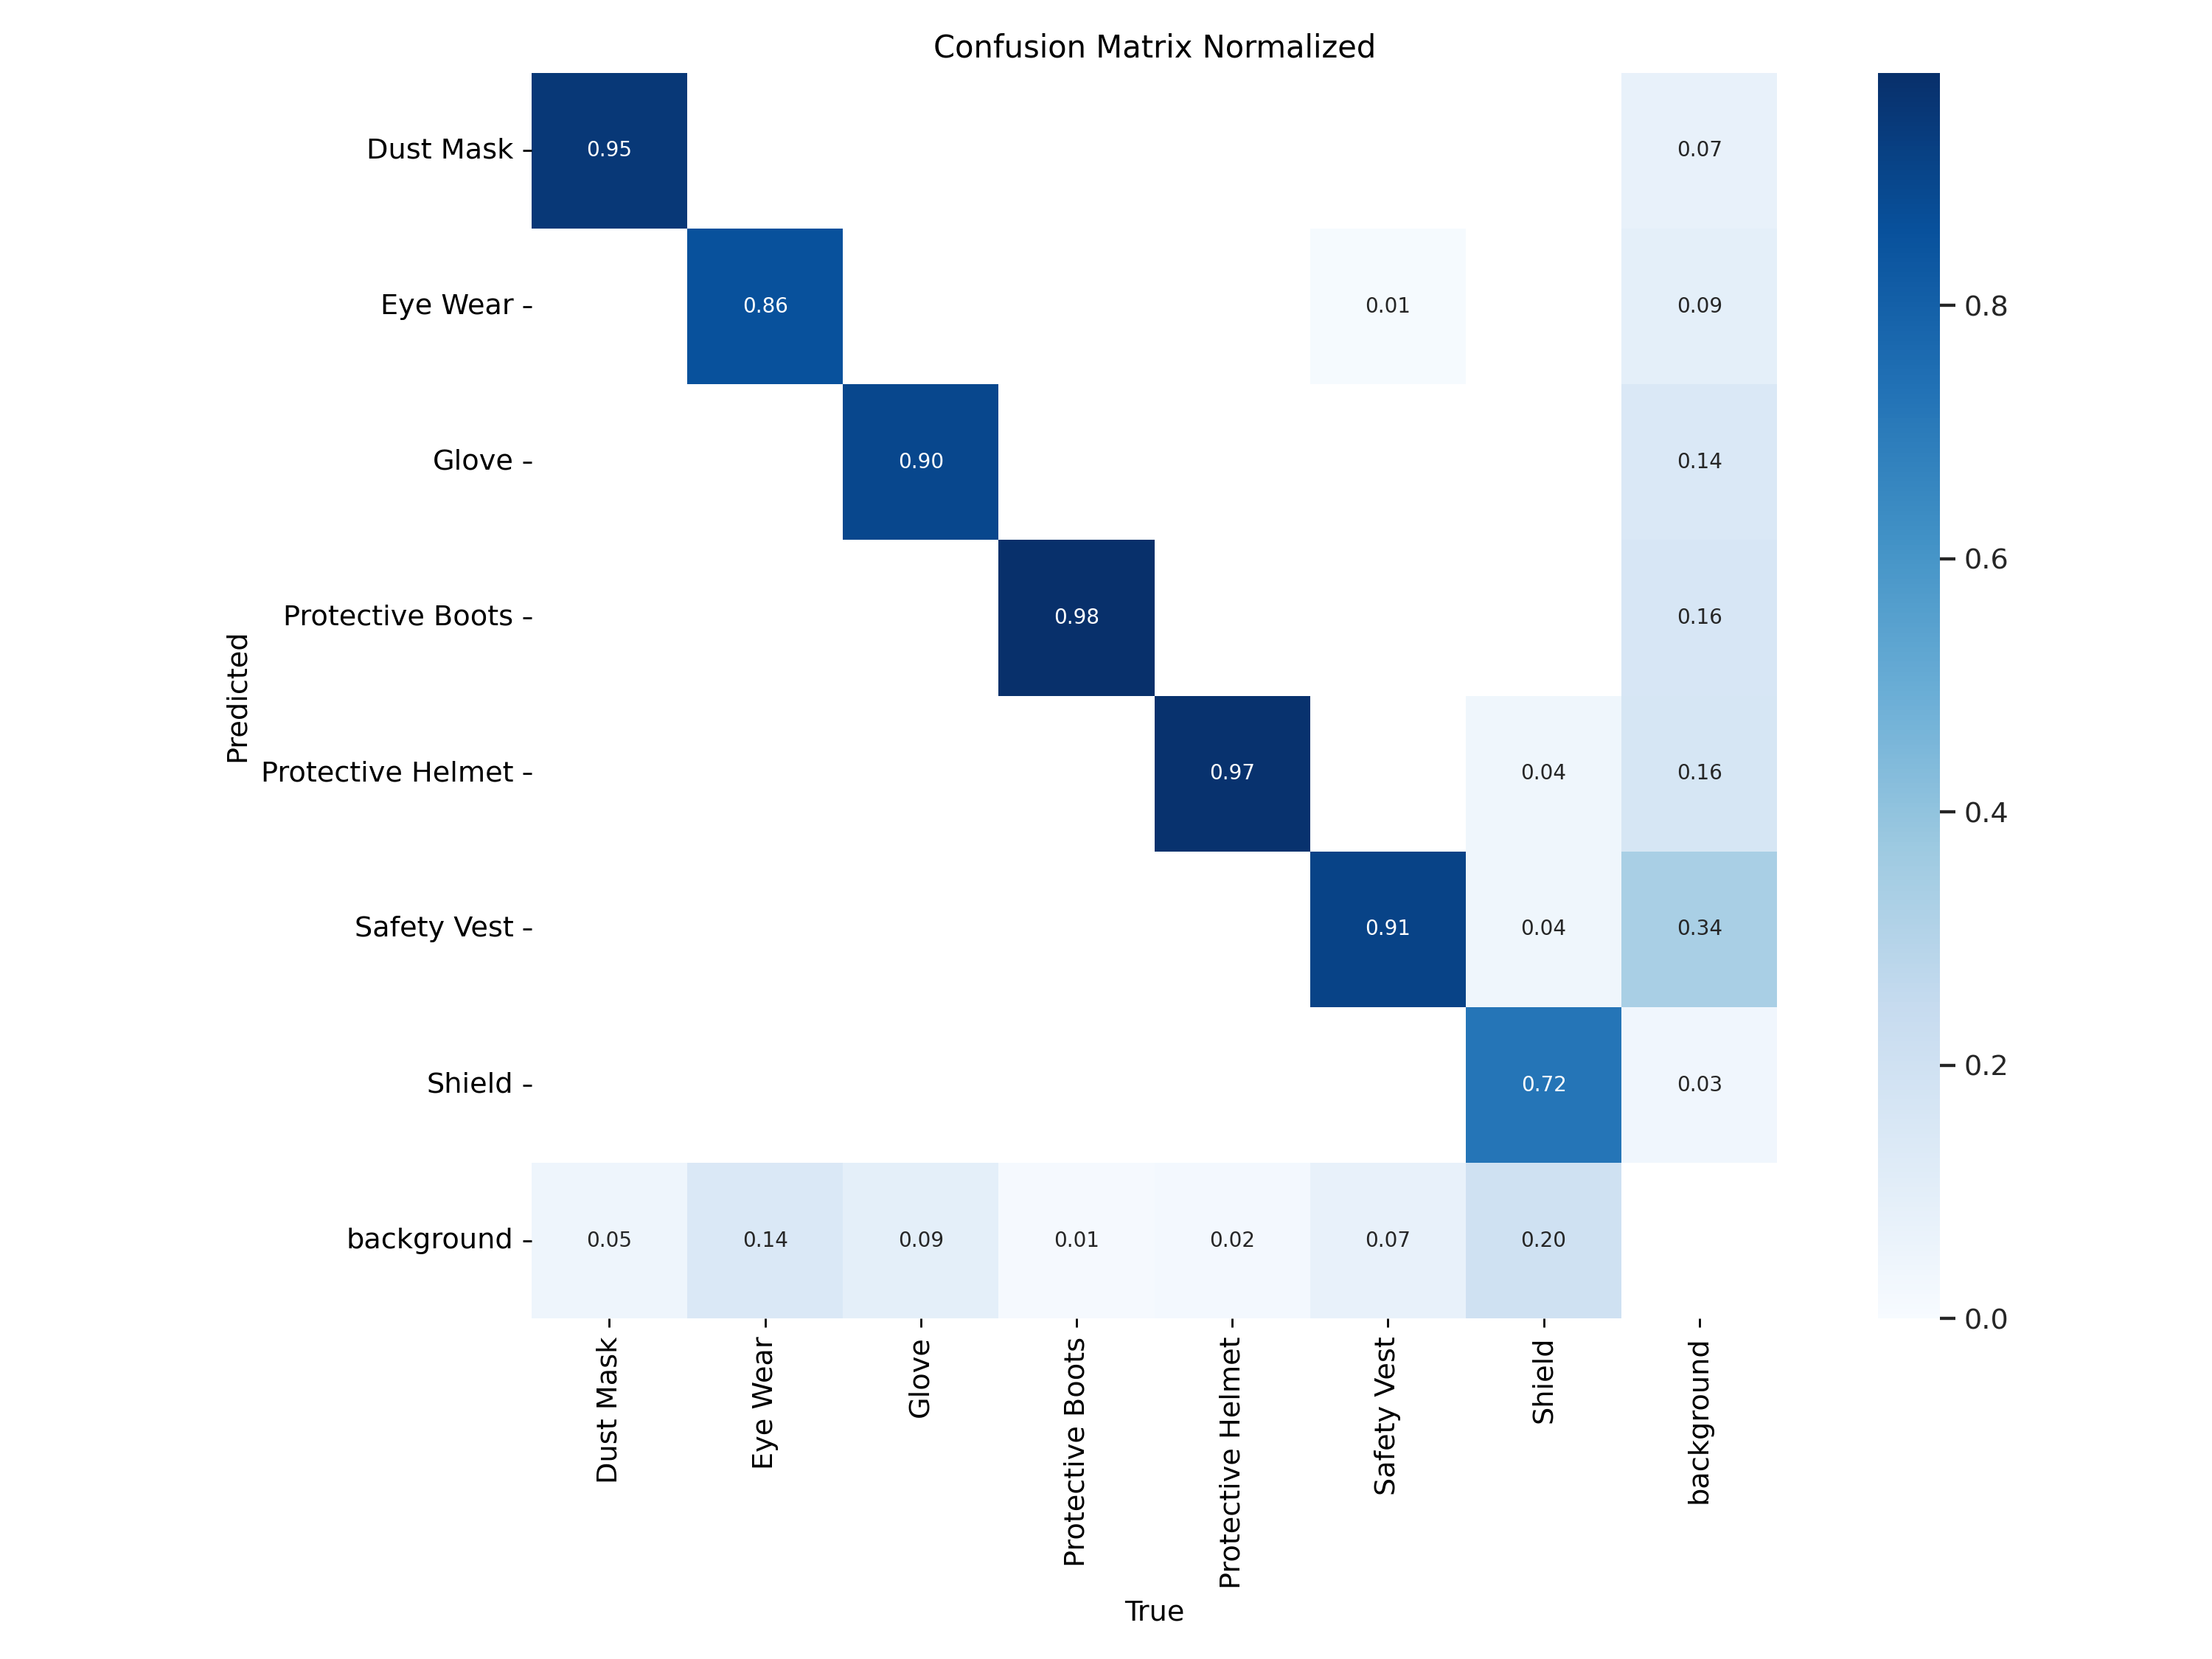

In [13]:
Image("/kaggle/working/runs/detect/train/confusion_matrix_normalized.png", width=600)

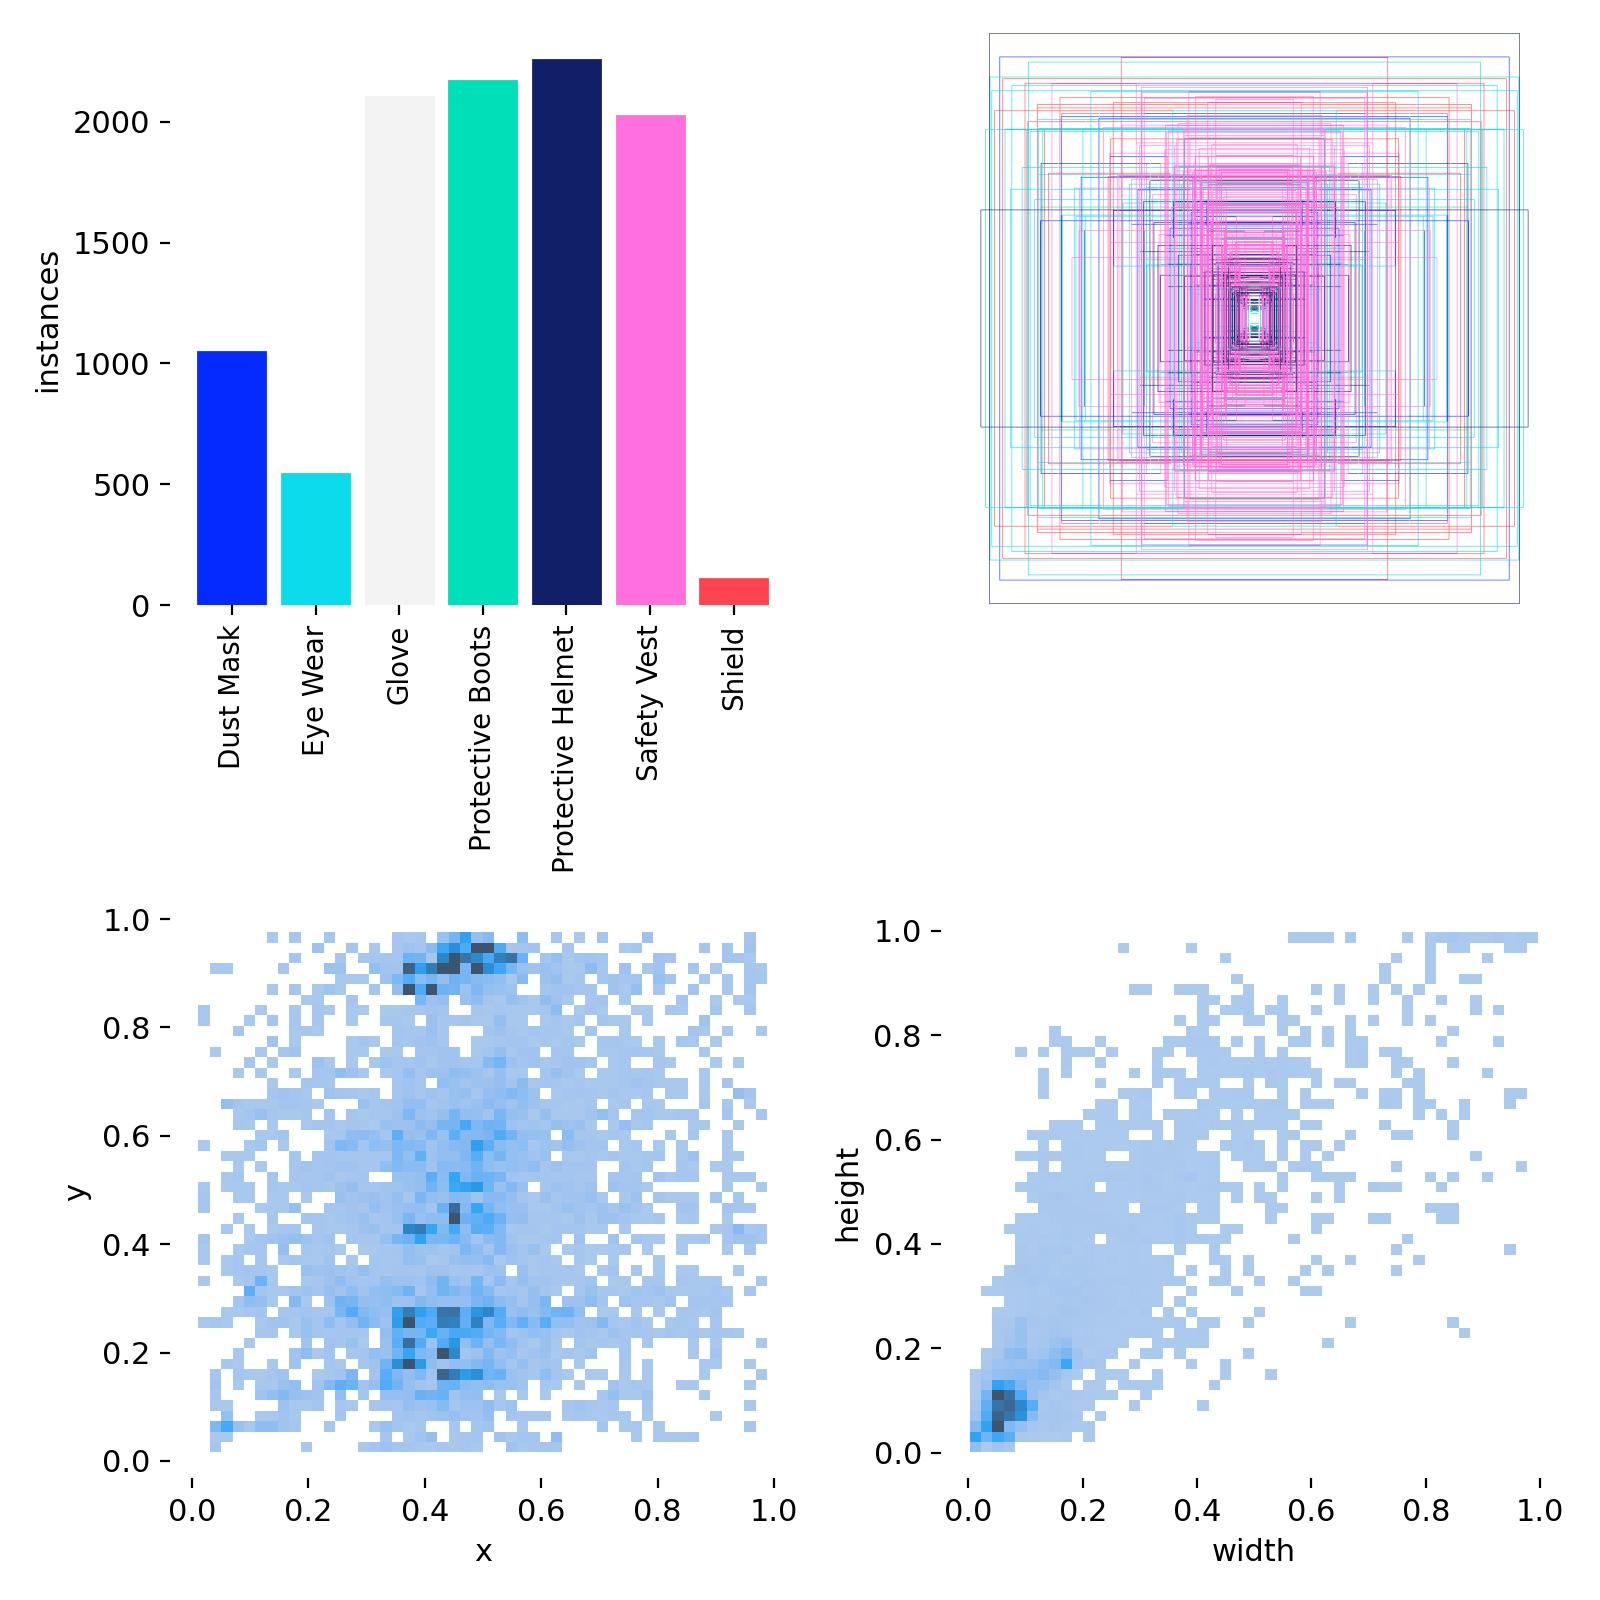

In [15]:
Image("/kaggle/working/runs/detect/train/labels.jpg", width=600)

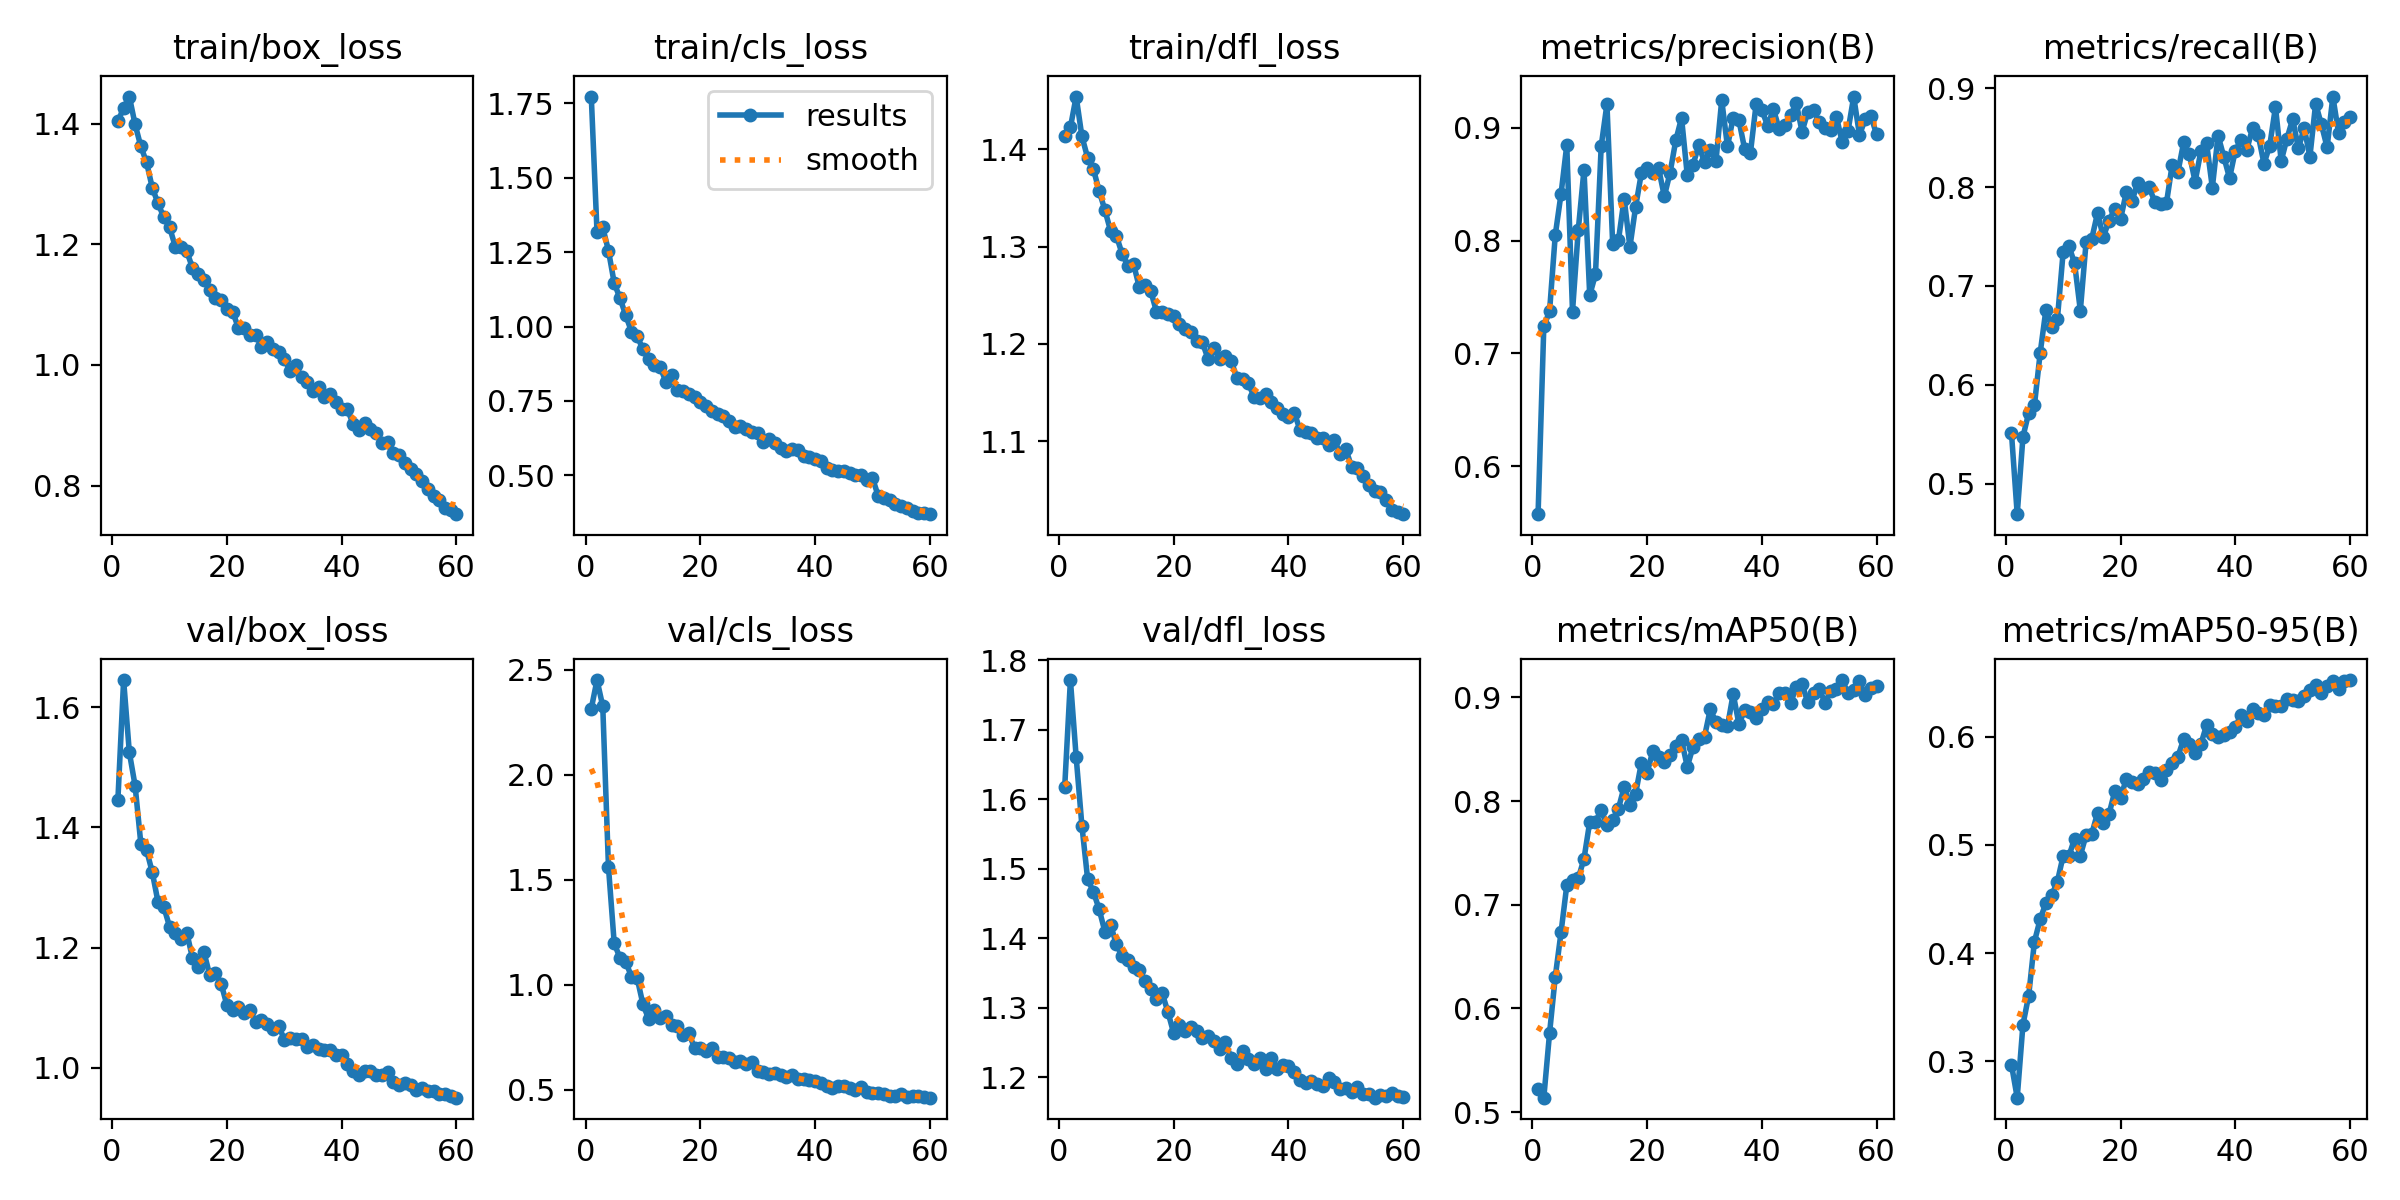

In [16]:
Image("/kaggle/working/runs/detect/train/results.png", width=600)

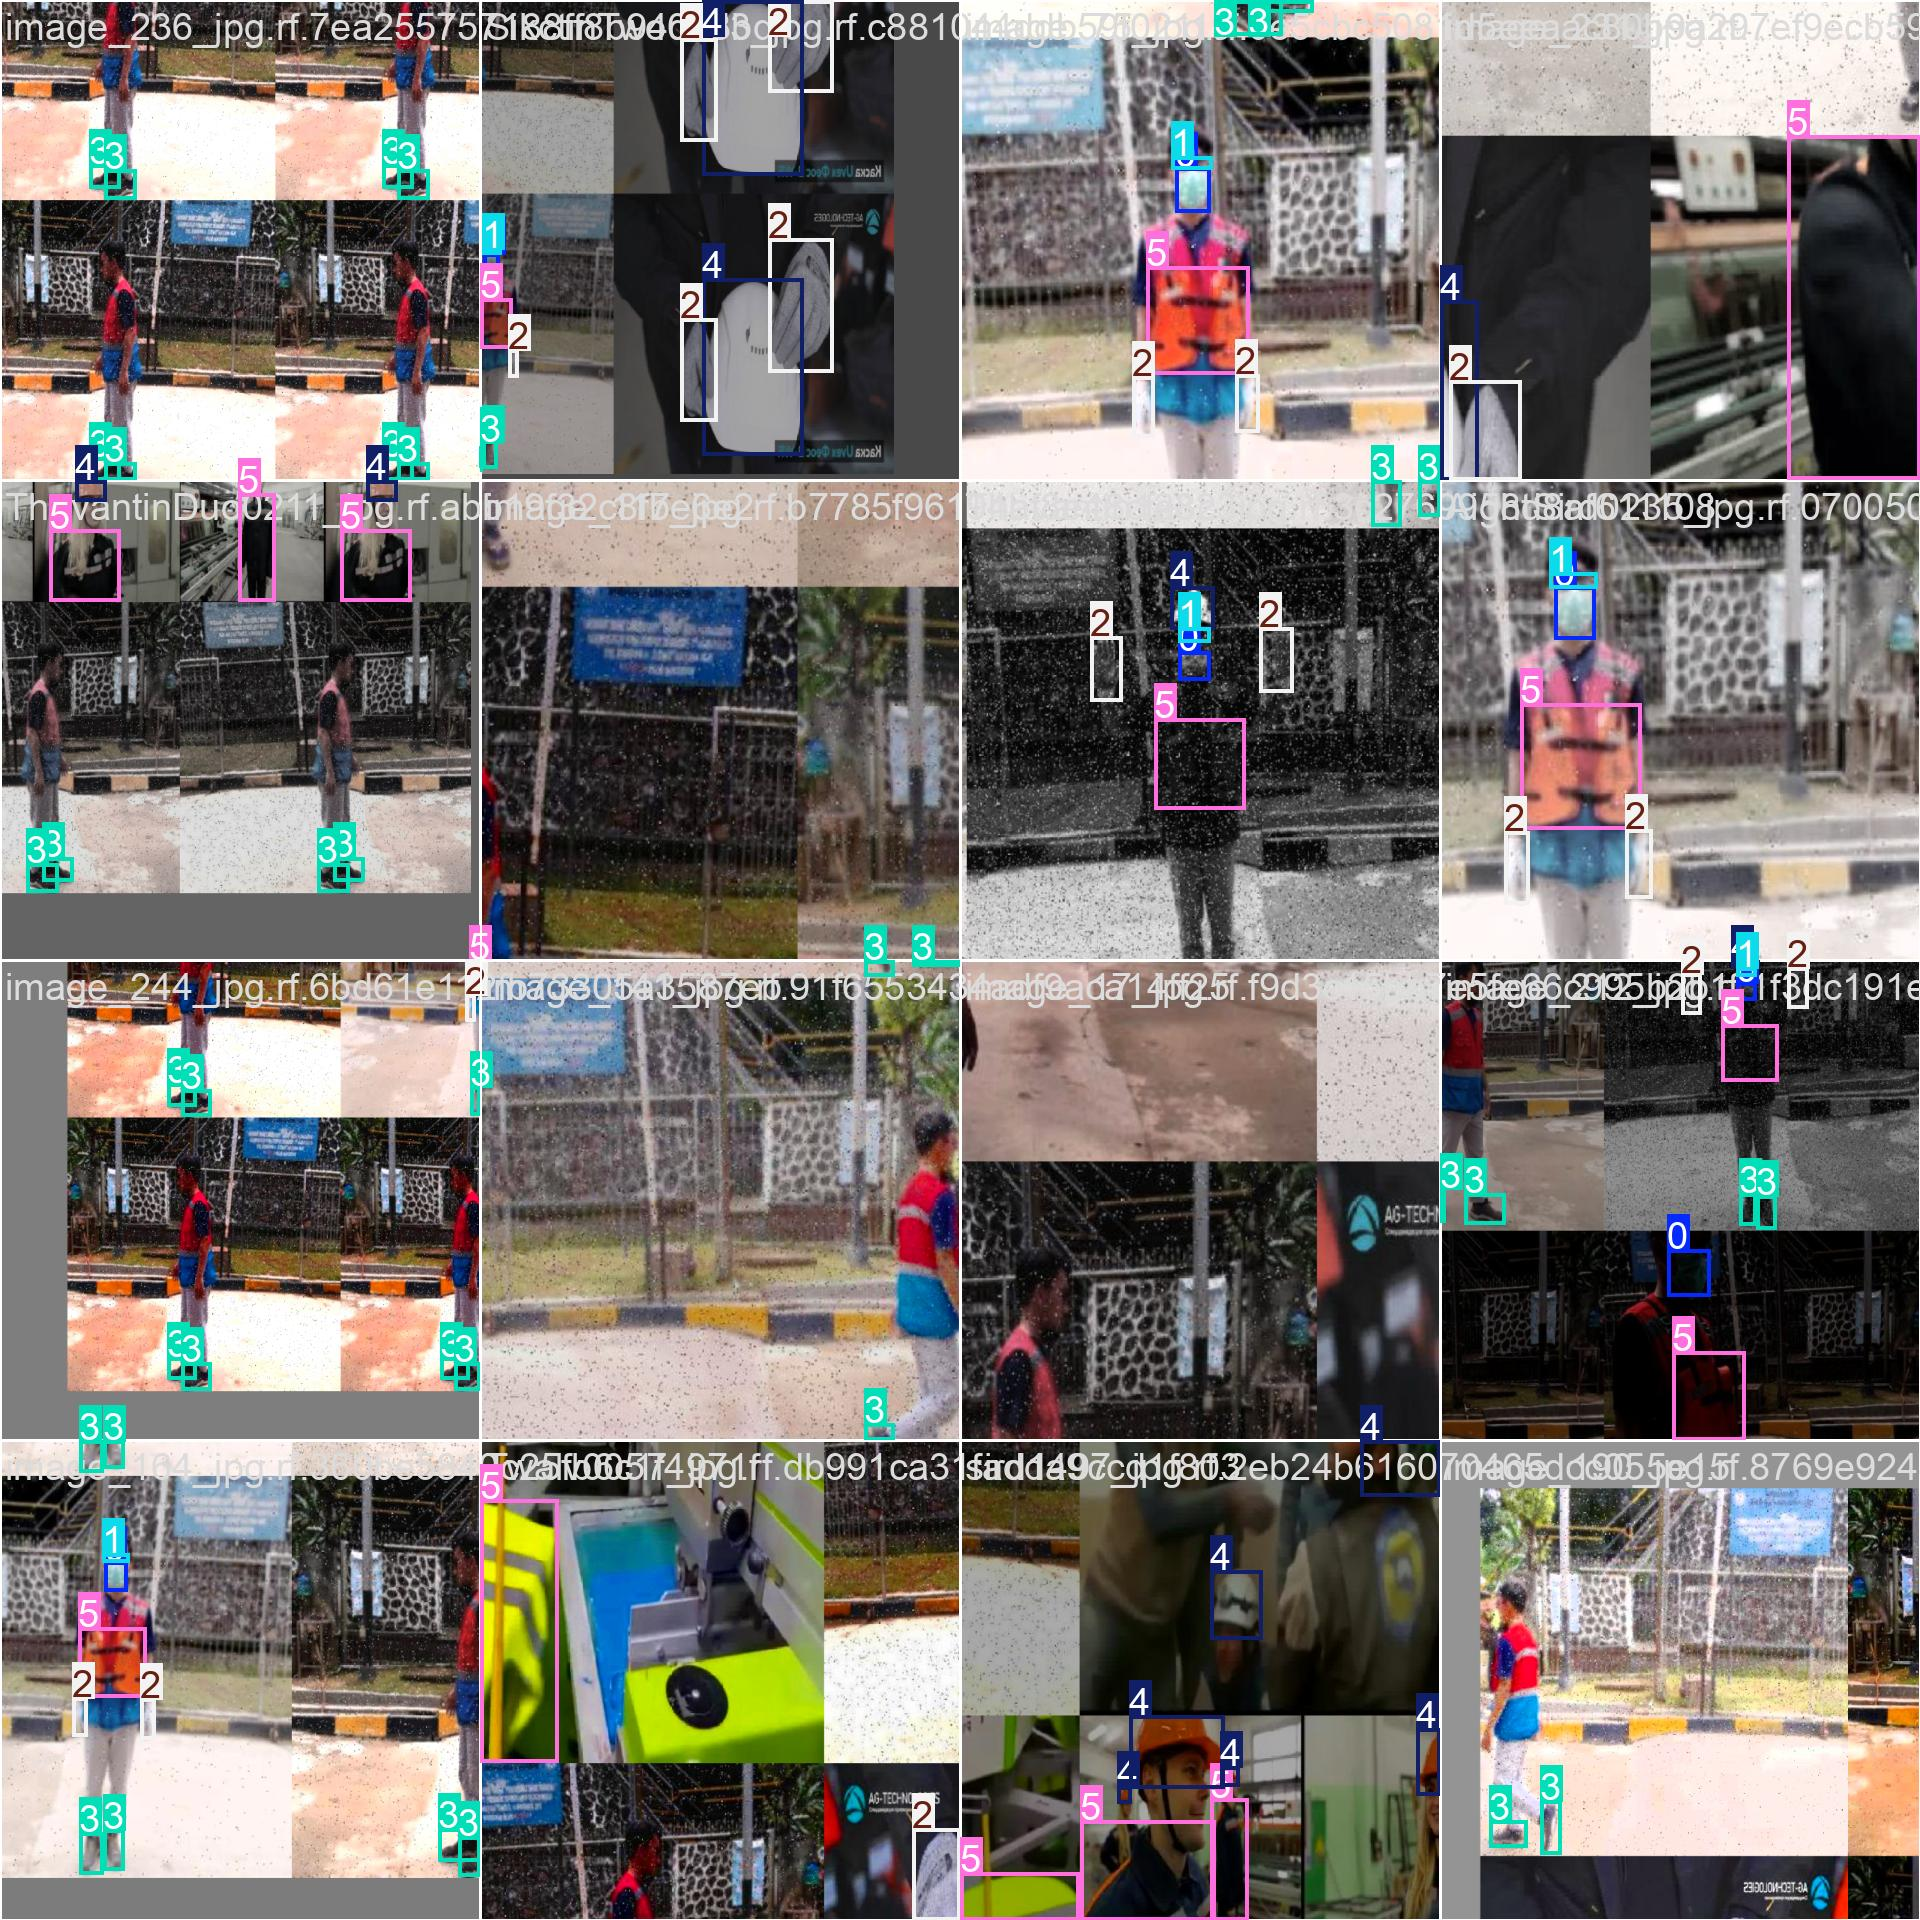

In [17]:
Image("/kaggle/working/runs/detect/train/train_batch0.jpg", width=600)

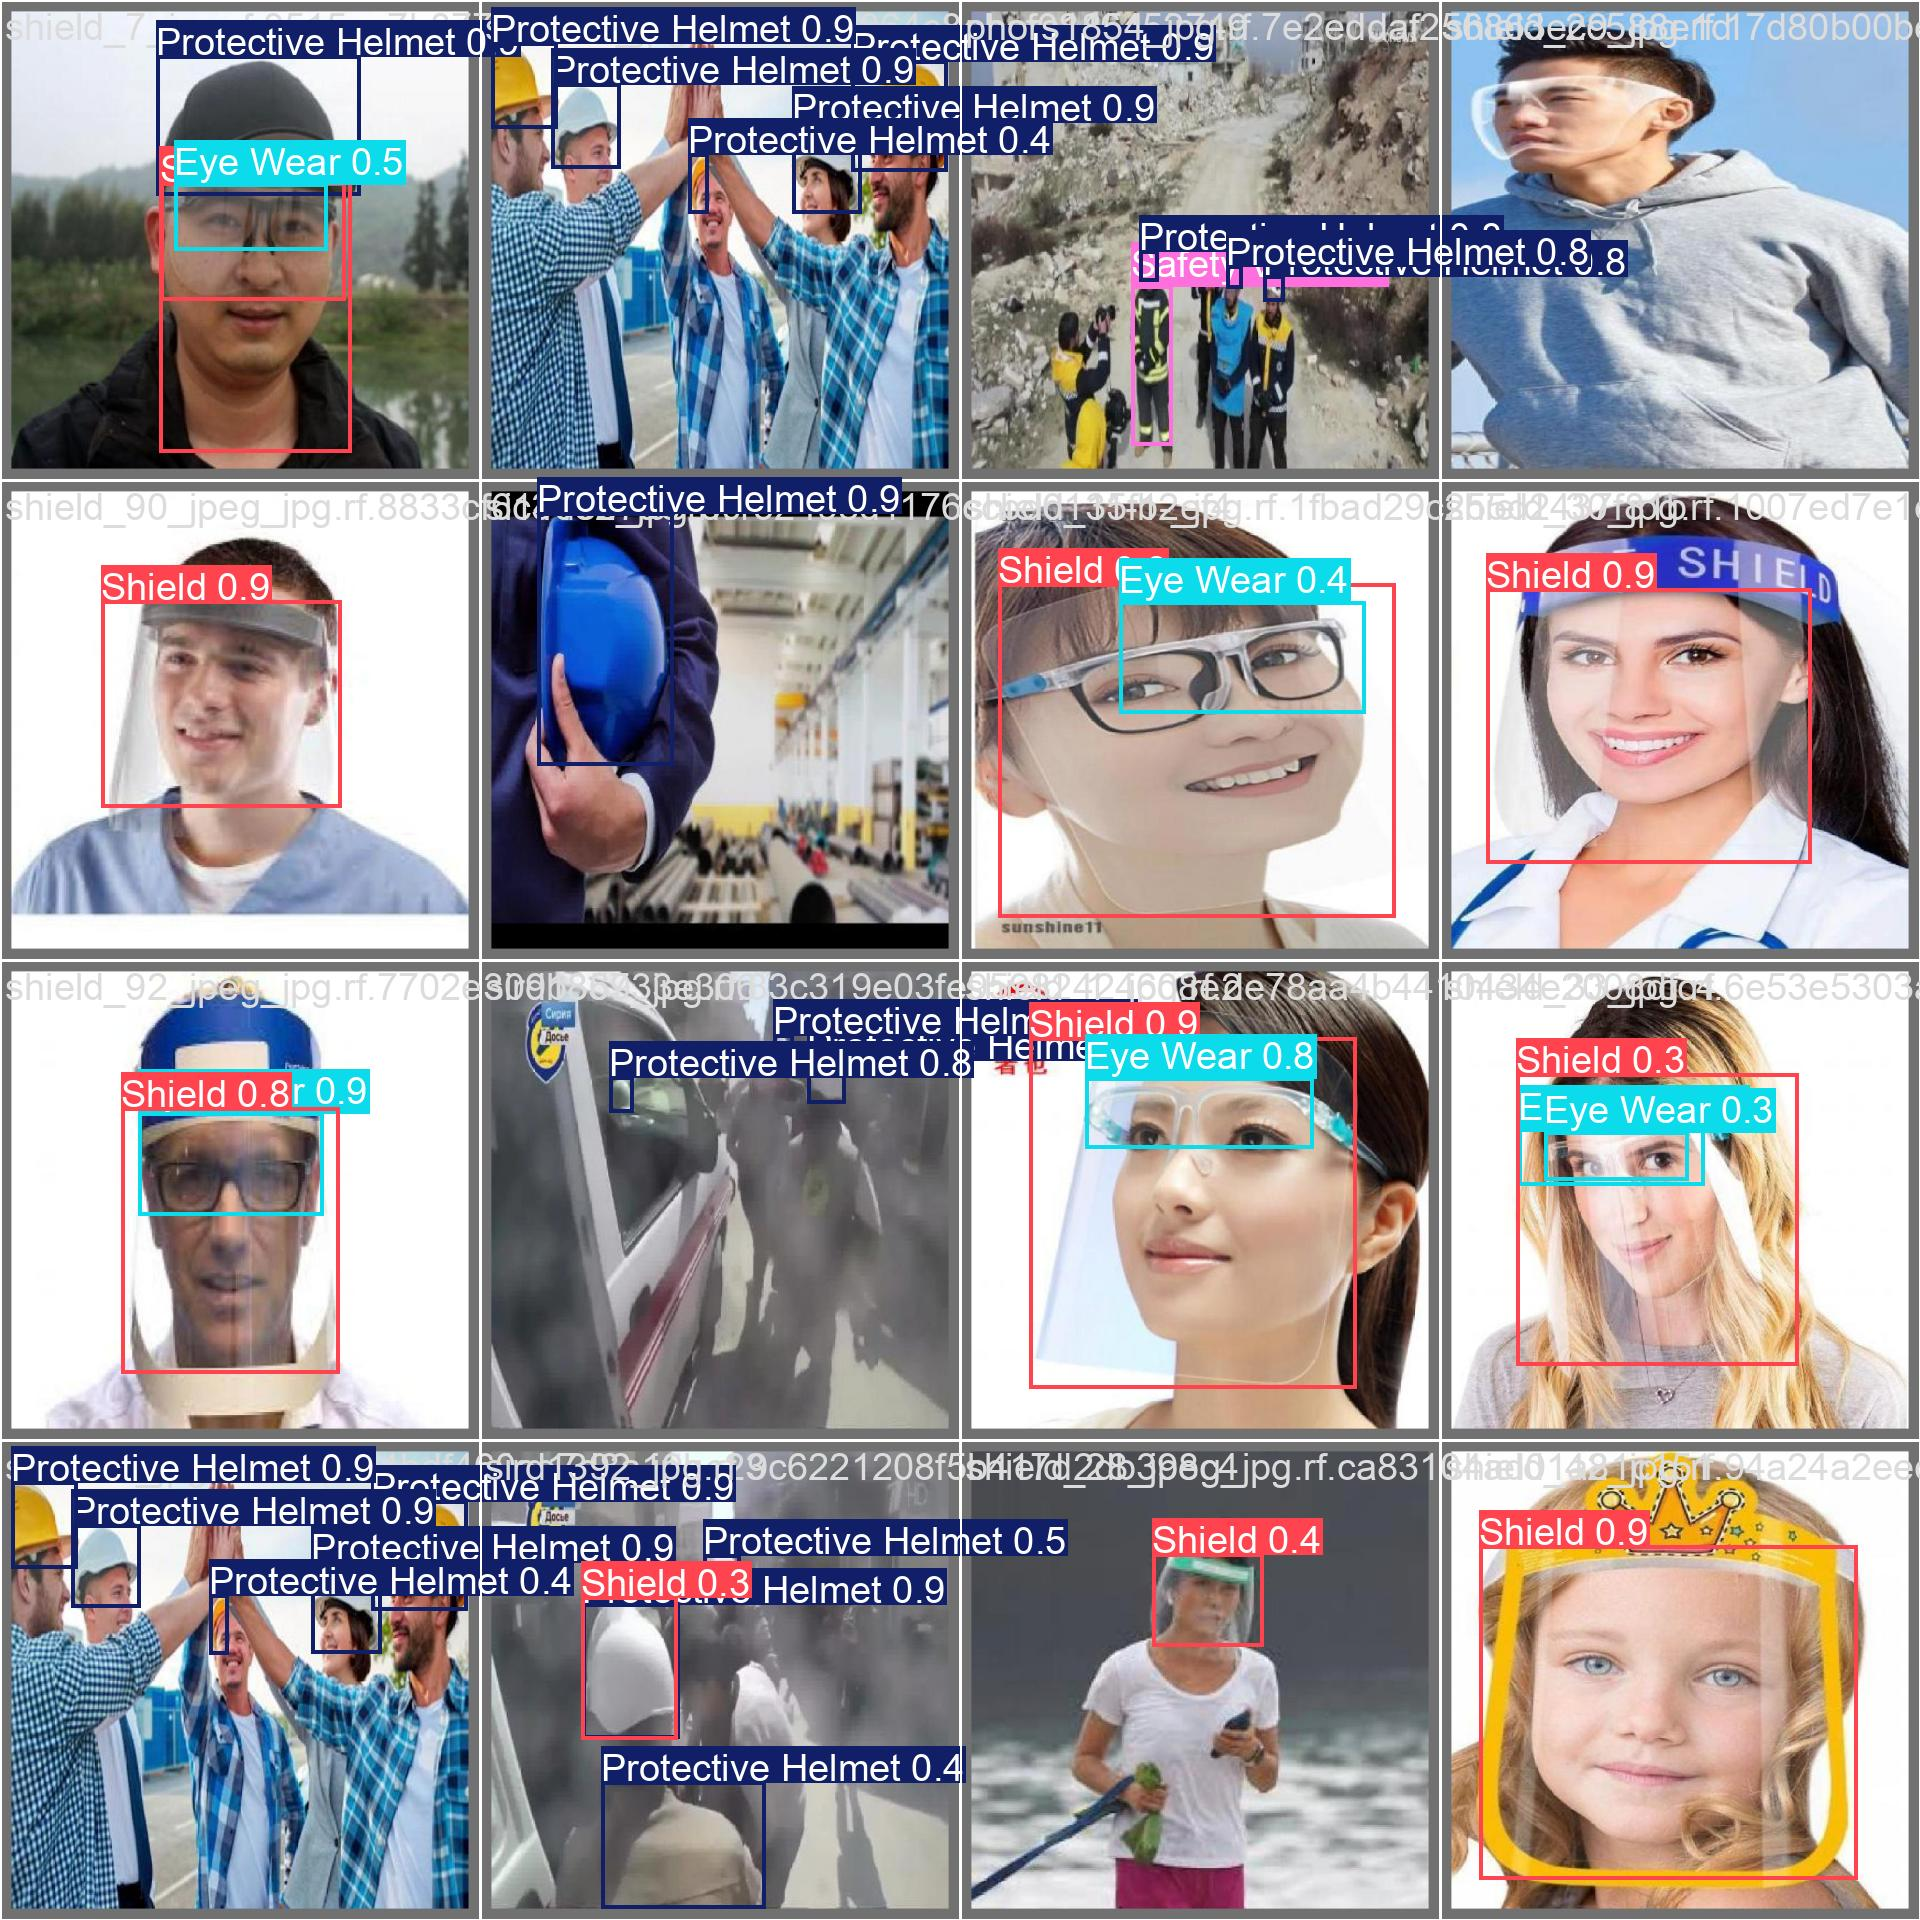

In [18]:
Image("/kaggle/working/runs/detect/train/val_batch0_pred.jpg", width=600)

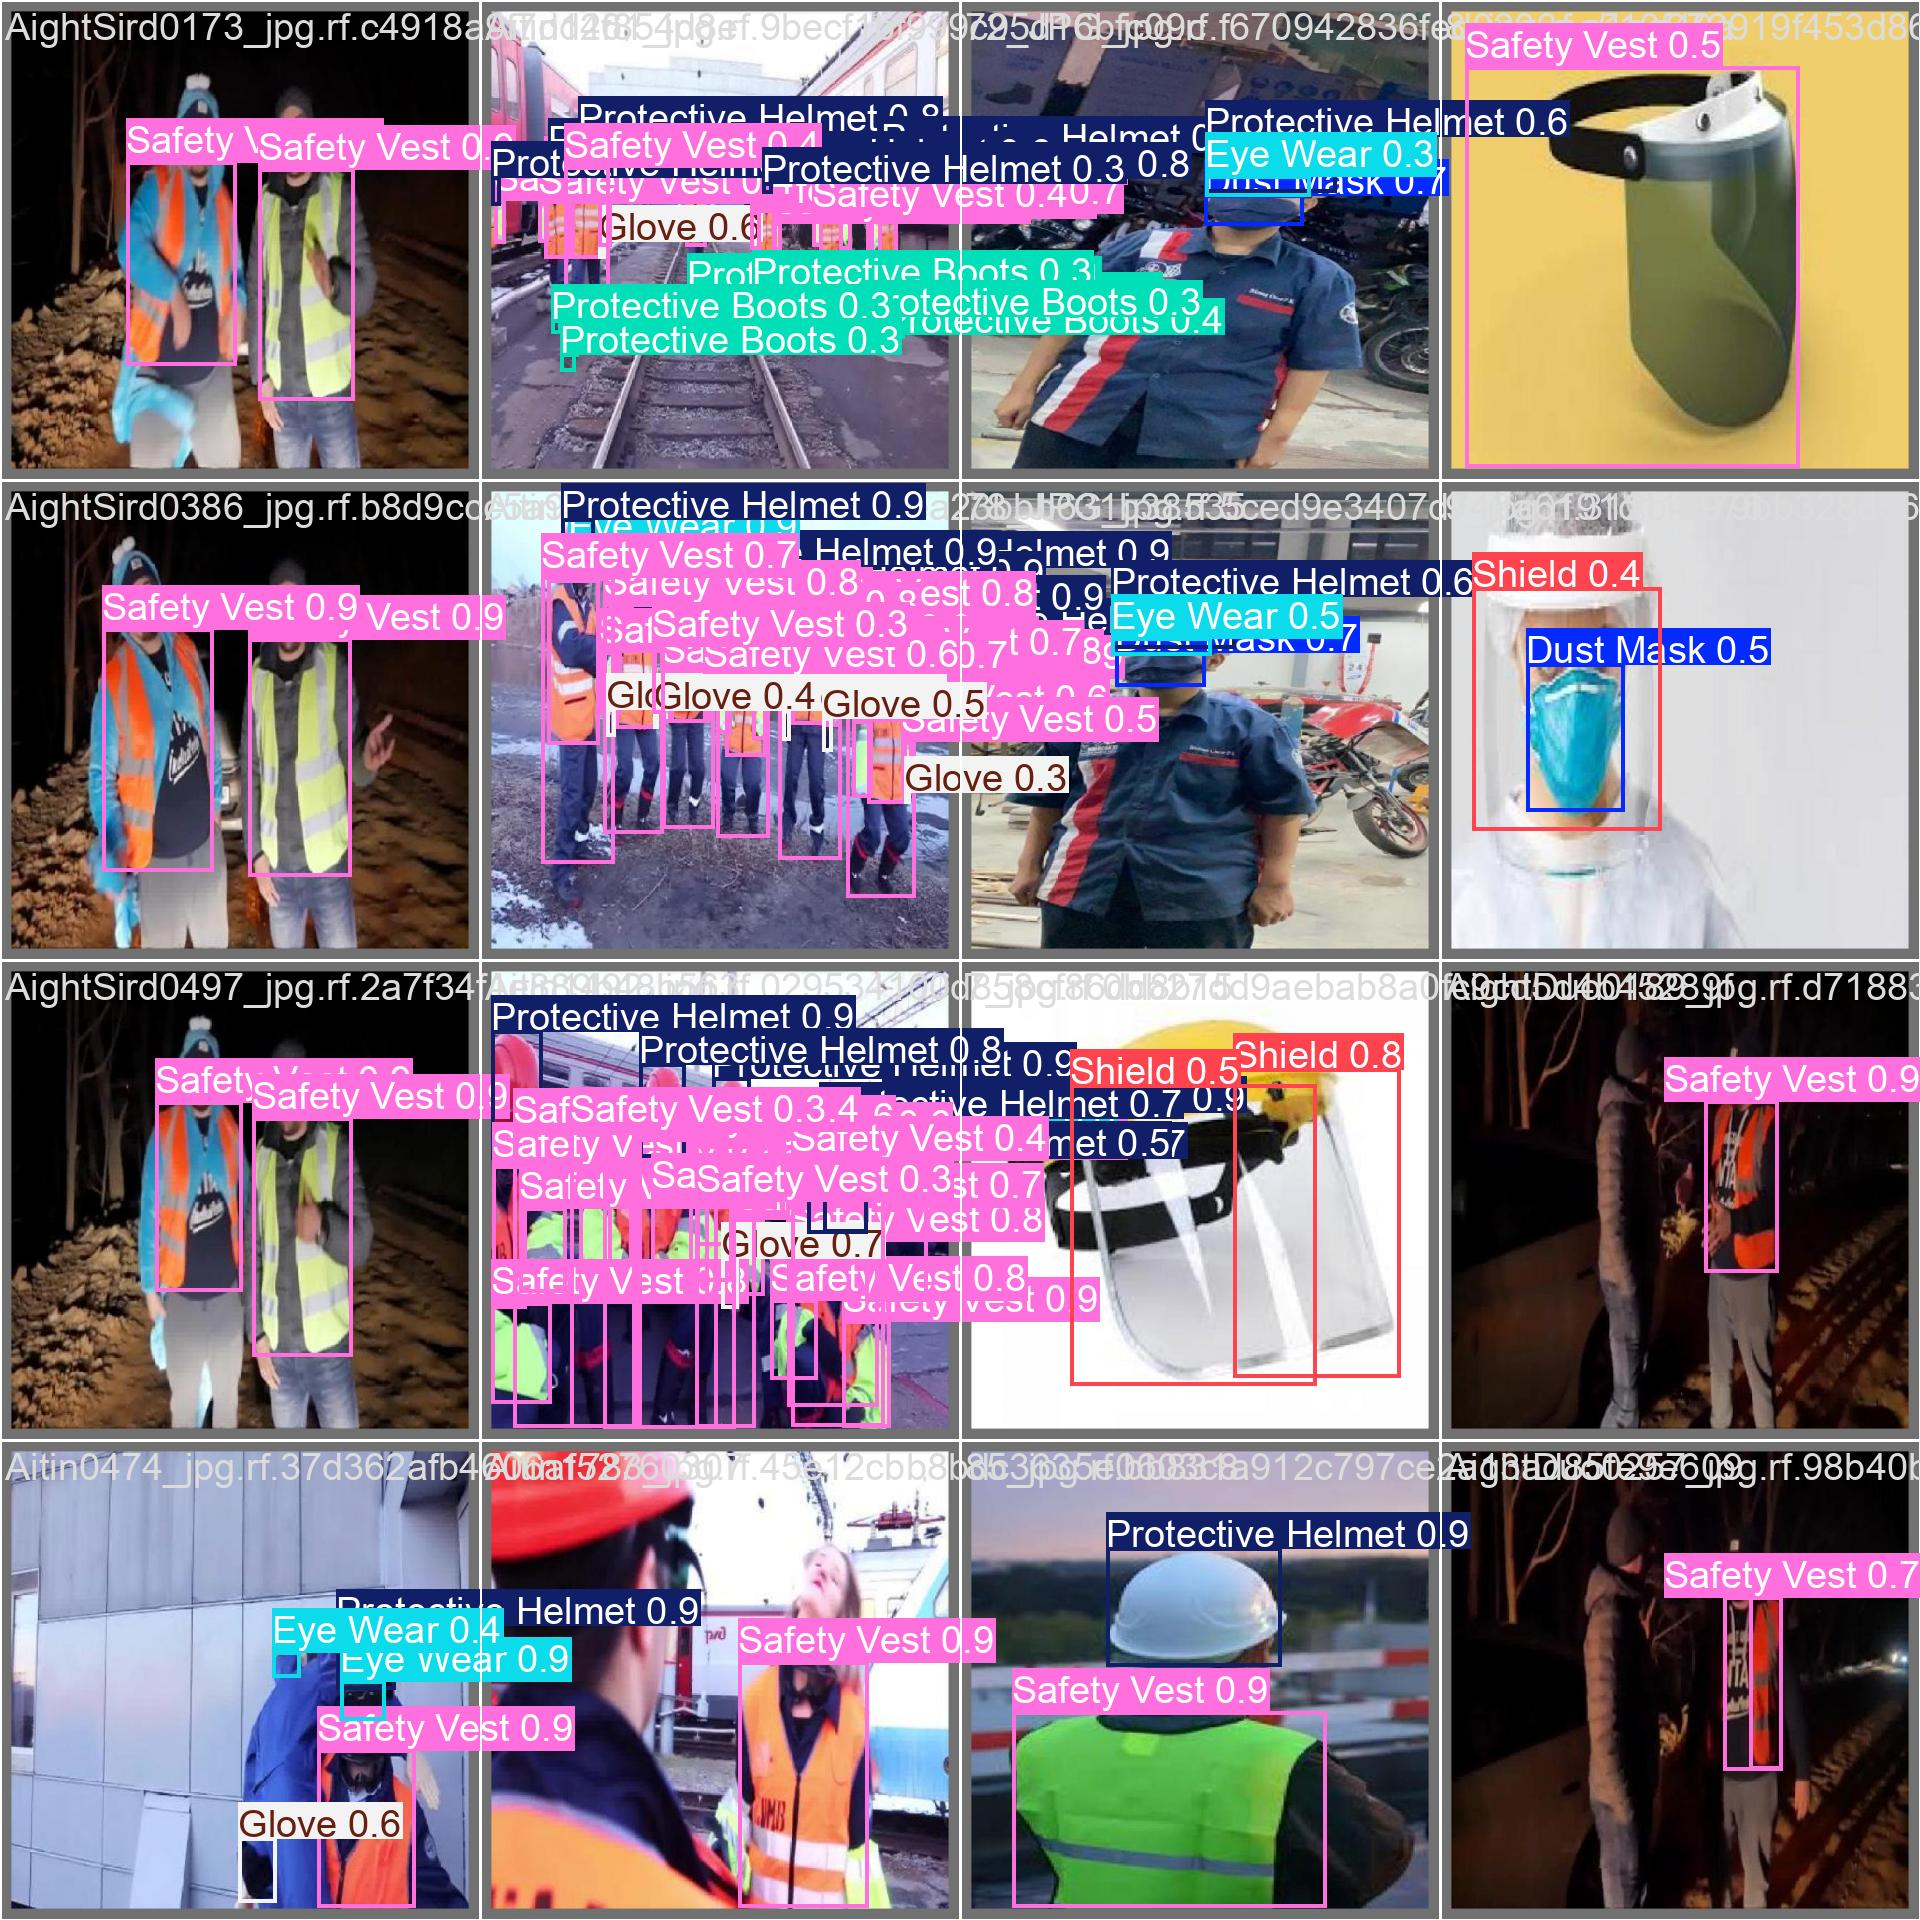

In [19]:
Image("/kaggle/working/runs/detect/train/val_batch1_pred.jpg", width=600)

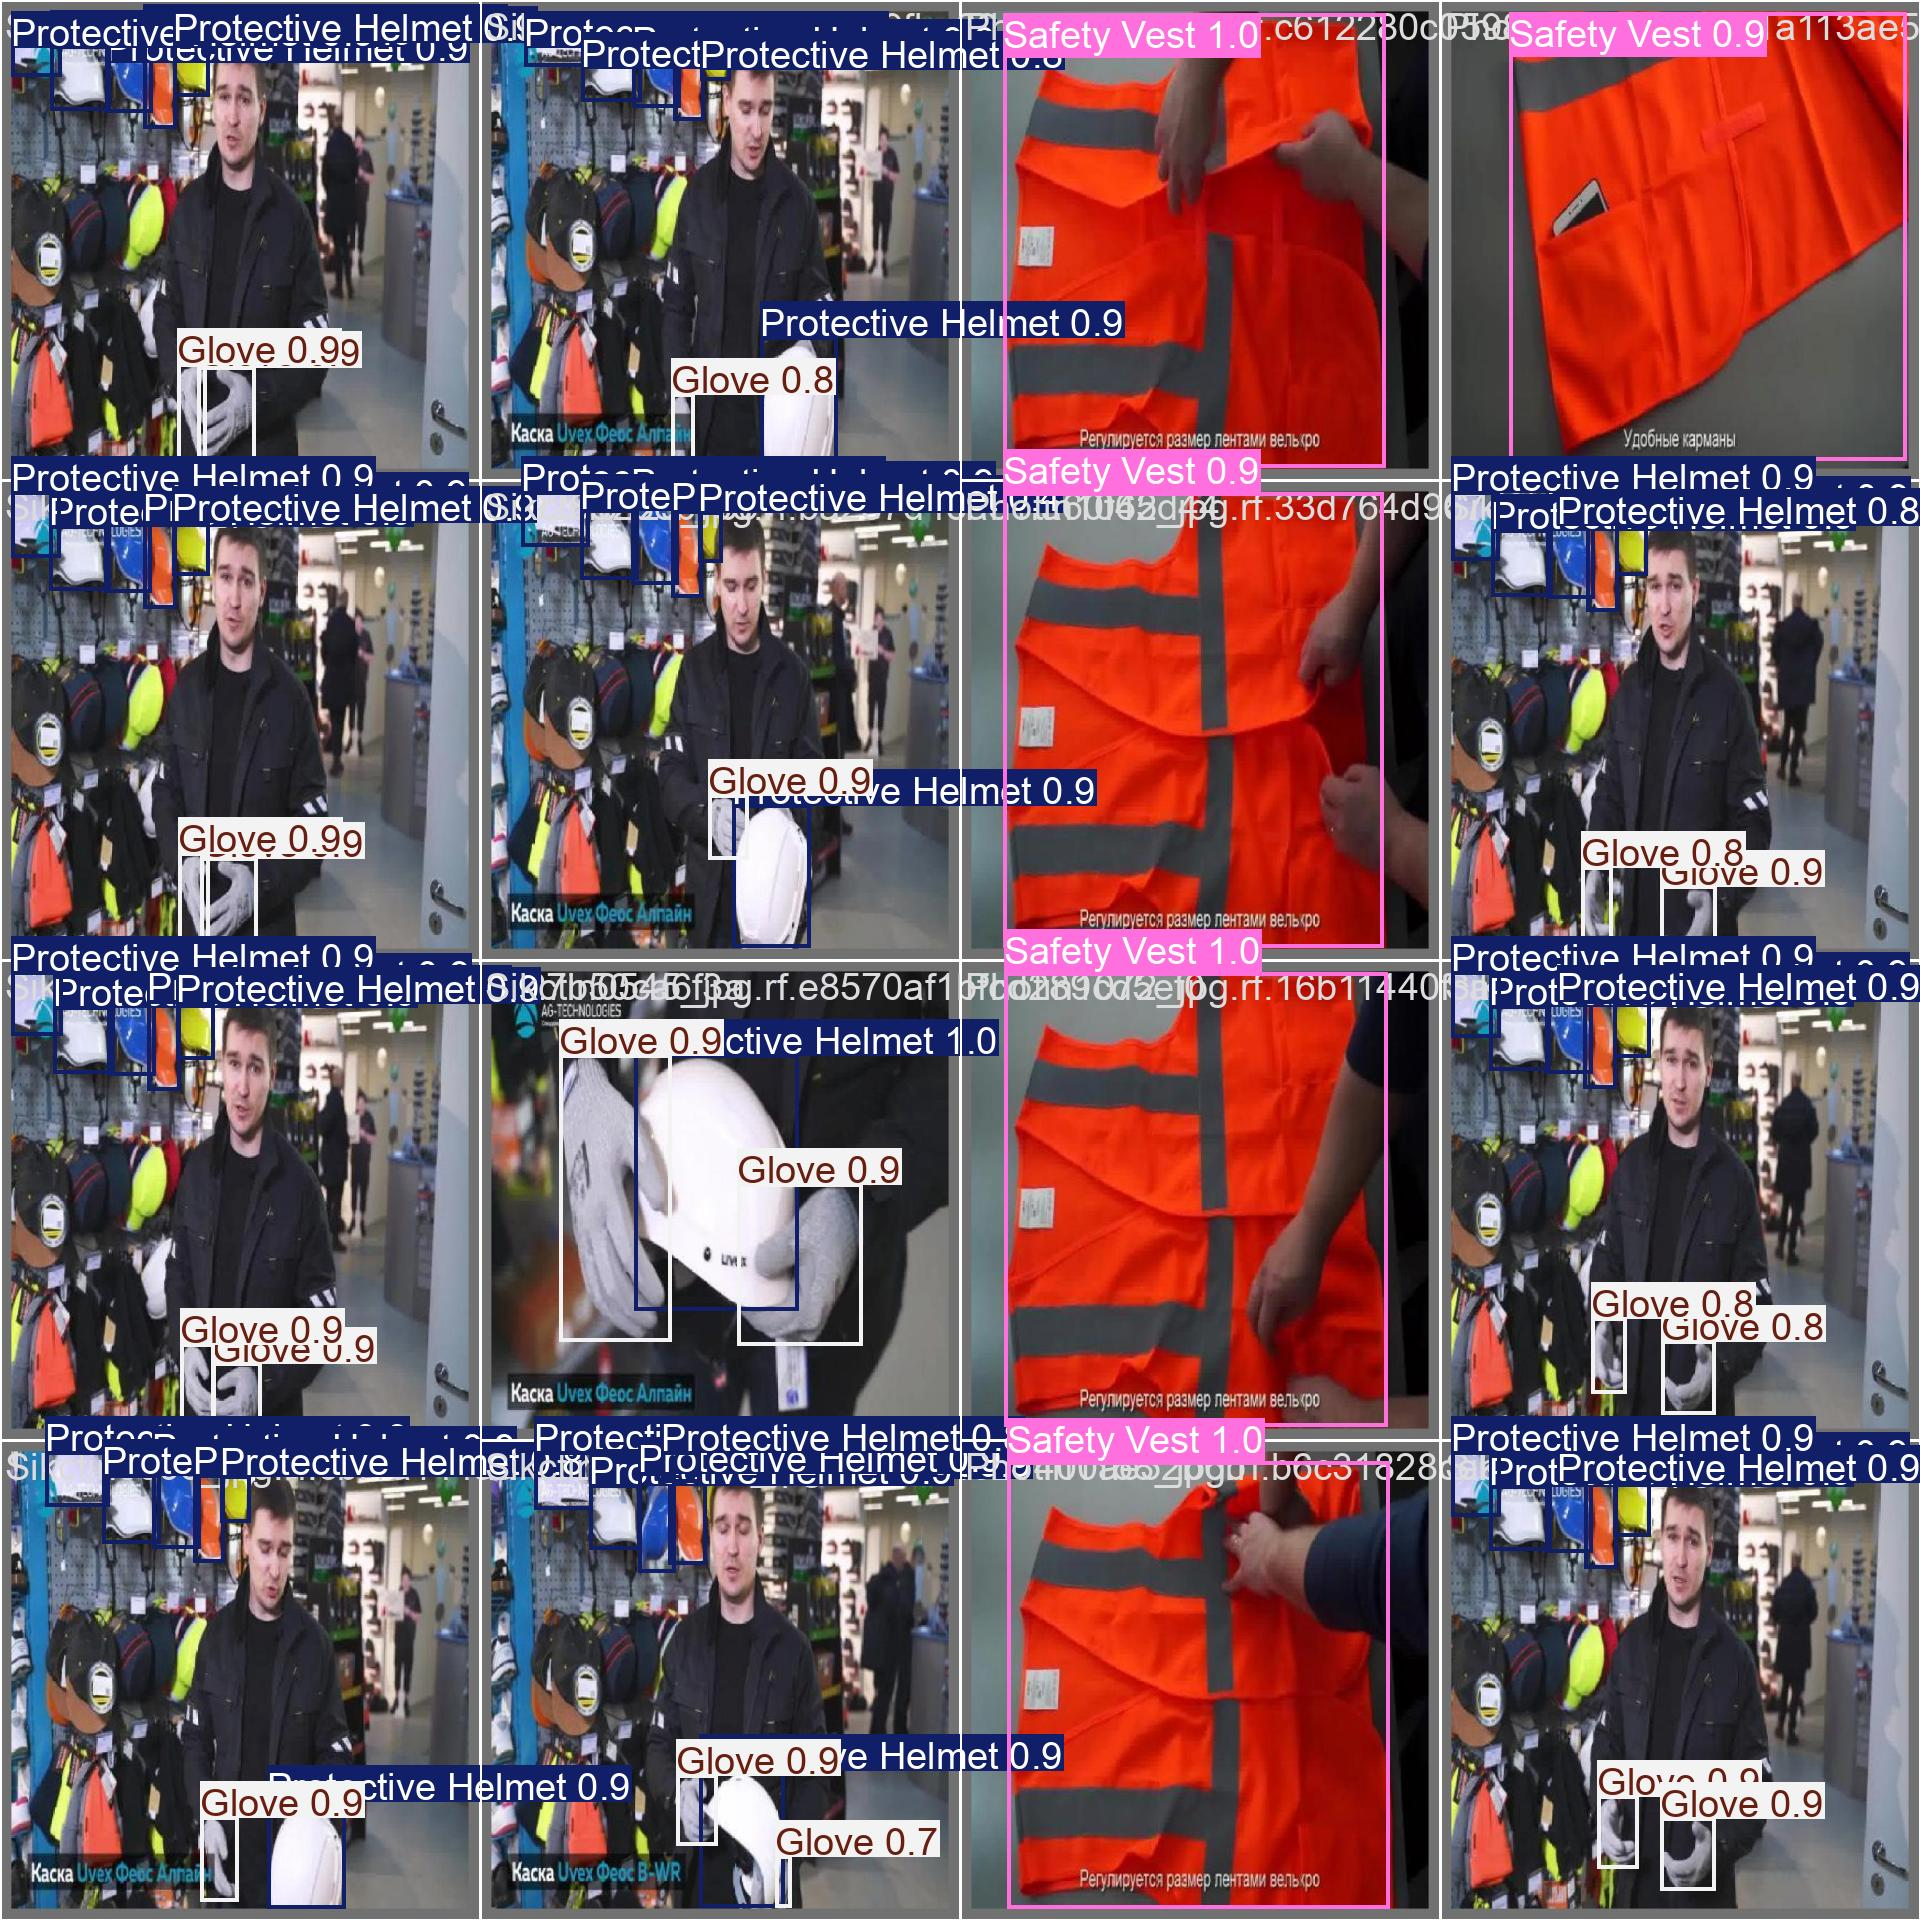

In [20]:
Image("/kaggle/working/runs/detect/train/val_batch2_pred.jpg", width=600)

In [23]:
!yolo task=detect mode=val model="/kaggle/working/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.131 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11l summary (fused): 190 layers, 25,284,709 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1814.5±670.4 MB/s, size: 55.7 KB)
val: Scanning /kaggle/working/PPE_Detection-2/valid/labels.cache... 637 images, 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        637       3064      0.894      0.871       0.91      0.652
             Dust Mask        299        308      0.943      0.942      0.966      0.714
              Eye Wear        146        147      0.814      0.837      0.842      0.487
                 Glove        346        631      0.953      0.891      0.949      0.706
      Protective Boots        298        608      0.945      0.969      0.984      0.717
     Protective Helmet        403        753      0.959      0.964      0.988       0.78
           Safety Vest        359       

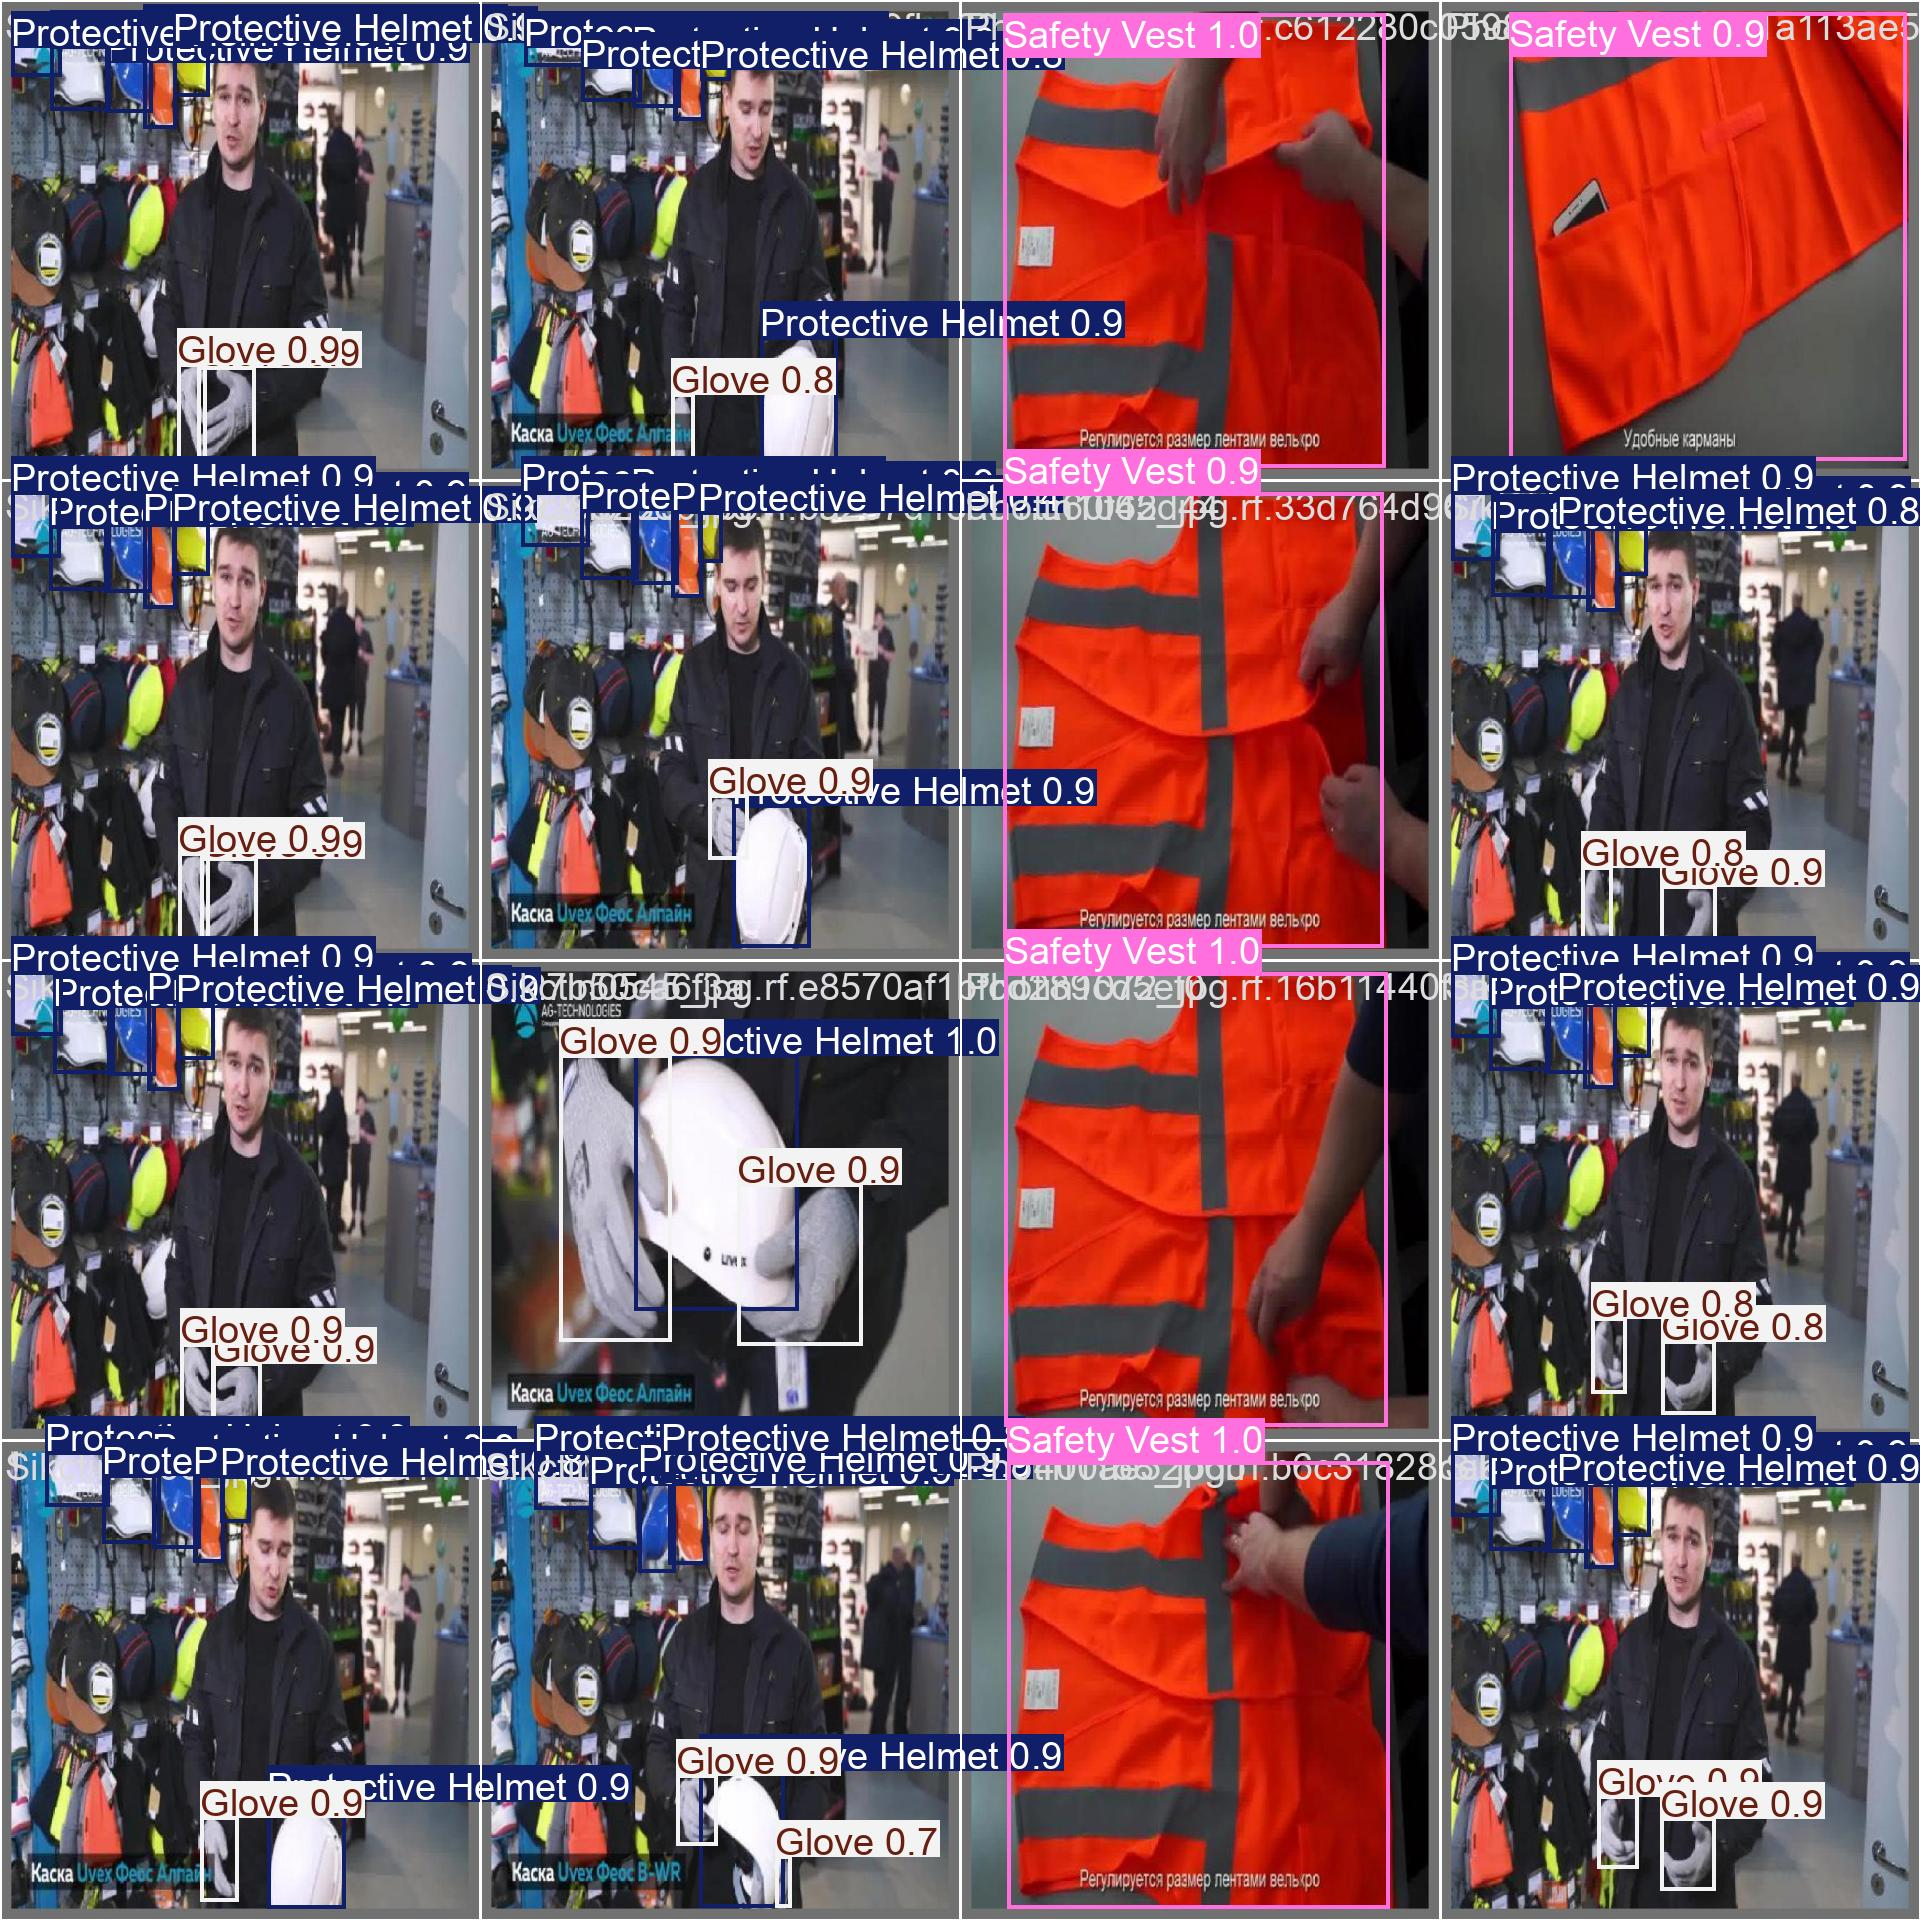

In [24]:
Image("/kaggle/working/runs/detect/train/val_batch2_pred.jpg", width=600)

In [25]:
!yolo task=detect mode=predict model= /kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.131 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11l summary (fused): 190 layers, 25,284,709 parameters, 0 gradients, 86.6 GFLOPs

image 1/322 /kaggle/working/PPE_Detection-2/test/images/000446_jpg.rf.63a960737ed4b762294eea1ad1a92791.jpg: 640x640 1 Protective Helmet, 20.6ms
image 2/322 /kaggle/working/PPE_Detection-2/test/images/20220721_161946_jpg.rf.905c375aa964159f9edab2a55a6e7476.jpg: 640x640 (no detections), 20.6ms
image 3/322 /kaggle/working/PPE_Detection-2/test/images/20220721_162015_jpg.rf.ccb5d8a5aed0bb50c04431fa0b0d5479.jpg: 640x640 1 Dust Mask, 1 Glove, 20.5ms
image 4/322 /kaggle/working/PPE_Detection-2/test/images/20220721_162036_jpg.rf.2664c2f59604cd2380a51fd174055a7e.jpg: 640x640 1 Dust Mask, 1 Glove, 20.5ms
image 5/322 /kaggle/working/PPE_Detection-2/test/images/20220721_162308_jpg.rf.913971a6c64f38eabc6b69bab4409b46.jpg: 640x640 1 Dust Mask, 1 Eye Wear, 1 Shield, 20.5ms
image 6/322 /kaggle/working/PPE_Detection-2/test/im

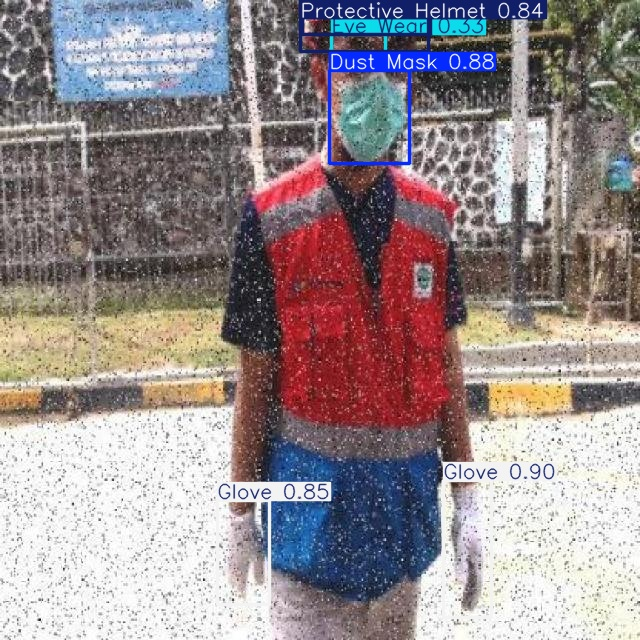

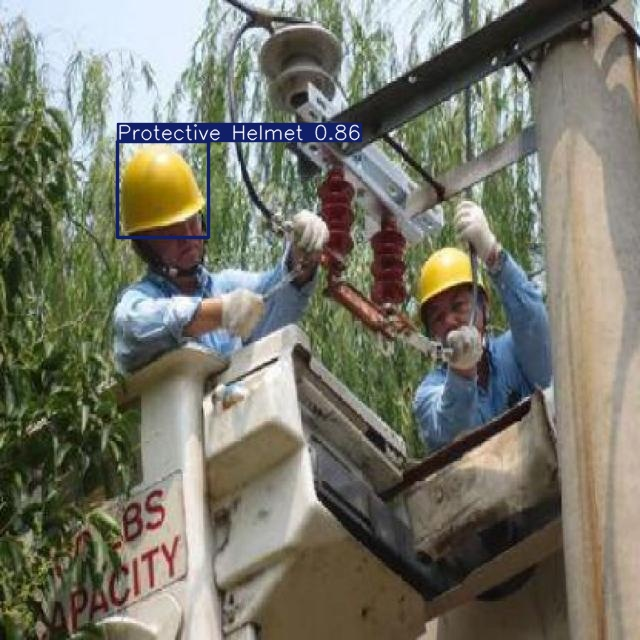

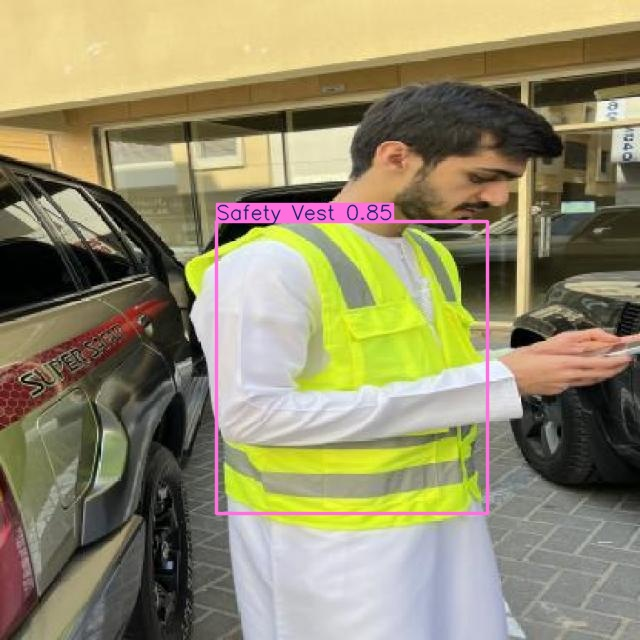

In [26]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [27]:
!zip -r kaggle_project.zip /kaggle/working/
from IPython.display import FileLink
FileLink("kaggle_project.zip")

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/yolo11n.pt (deflated 11%)
  adding: kaggle/working/PPE_Detection-2/ (stored 0%)
  adding: kaggle/working/PPE_Detection-2/test/ (stored 0%)
  adding: kaggle/working/PPE_Detection-2/test/images/ (stored 0%)
  adding: kaggle/working/PPE_Detection-2/test/images/frame-078_jpg.rf.8f94572ebe779e240b549933f1e6315b.jpg (deflated 15%)
  adding: kaggle/working/PPE_Detection-2/test/images/image_33_jpg.rf.67918b8248f676de291ad2467415d4b8.jpg (deflated 0%)
  adding: kaggle/working/PPE_Detection-2/test/images/000446_jpg.rf.63a960737ed4b762294eea1ad1a92791.jpg (deflated 0%)
  adding: kaggle/working/PPE_Detection-2/test/images/IMG_1037_jpg.rf.9140c582565af27bf545bfdf7e2e2119.jpg (deflated 0%)
  adding: kaggle/working/PPE_Detection-2/test/images/image_184_jpg.rf.6e3e662326936a9058c1dfe28eac386d.jpg (deflated 0%)
  adding: kaggle/working/PPE_Detection-2/test/images/image_258_jpg.rf.6c18

/kaggle/working/kaggle_project.zip